# DADS5001 Quiz2 + Final project (Live chat analytics)
To create a dash app which shows the analysis of live chat messages (e.g., Youtube, Facebook, Twitch, TikTok, etc.) \
Submit with video and source code. \
Idea + creative



## Group project
- 6420412008 Sirirat Lueprasert
- 6420412011 Adcharaporn Thailawan
- 6420412013 Supisra Udomlarp

## Topic: Opinion about EV car (Thai VDO)





## Video 1 
: Searching the video in Tiktok using keyword as "รถ EV" (to get the Thai video) with sorting by "Like count", the result as below:

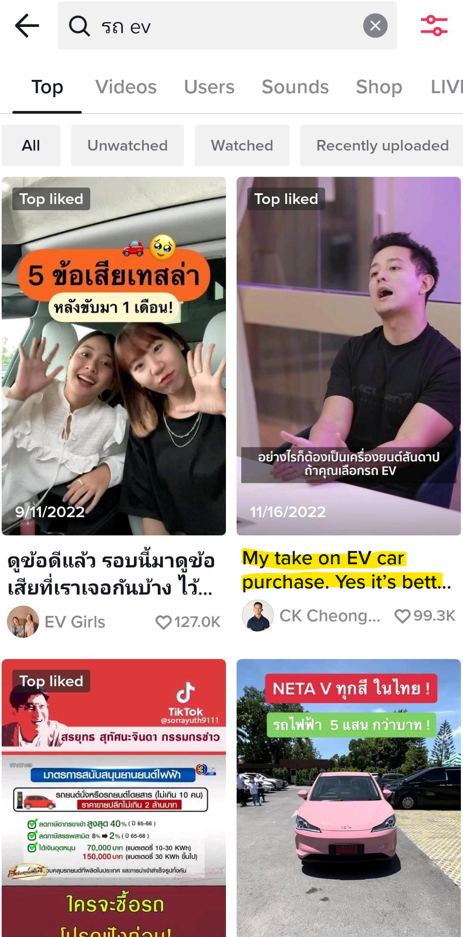

I choose to retrive comments in the video name "My take on EV car purchase..." as highlighted in the picture above. Because the VDO content is about the EV car in generic (not about any specific brand/model) \
Link of VDO: https://www.tiktok.com/@ckfastwork/video/7166548702008511771?is_copy_url=1&is_from_webapp=v1&q=my%20take%20on&t=1672803382660 \
Retrieved comment date 4 Jan 2023 Time 12:32:31 GMT+0700

### Tiktok Comment Scrapper


I followed the method of 'cubernetes' who posted the detail of how to scrap Tiktok comment with his code(free) in the following link: https://github.com/cubernetes/TikTokCommentScraper

Other methods as he has metioned is in this link https://www.reddit.com/r/DataHoarder/comments/sp55a3/scraping_tiktok_comments_without_paying_for_those/. \
After followed the method I get the .xlsx file then I save the data into 2 csv files for ease of use (file name: Comments_1672810590.675626_1, Comments_1672810590.675626_2)

### Import data from CSV file

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_details = pd.read_csv('https://raw.githubusercontent.com/SiriratL/DADS5001_Finalproject/main/Comments_1672810590.675626_1.csv')
df_comment = pd.read_csv('https://raw.githubusercontent.com/SiriratL/DADS5001_Finalproject/main/Comments_1672810590.675626_2.csv')

In [ ]:
df_details.loc['Publisher Nickname','col1'] = 'CK Cheong, CPA'
df_details = df_details.drop(columns=['col2'])

### Explore data

In [ ]:
df_details

,col1
Now,Wed Jan 04 2023 12:32:31 GMT+0700 (Indochina T...
Post URL,https://www.tiktok.com/@ckfastwork/video/71665...
Publisher Nickname,"CK Cheong, CPA"
Publisher @,ckfastwork
Publisher URL,https://www.tiktok.com/@ckfastwork
Publish Time,16-11-2022
Post Likes,98.6K
Post Shares,NaN
Description,My take on EV car purchase. Yes it’s better fo...
Number of 1st level comments,730


In [ ]:
df_comment.head()

,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,User Replied To,Number of Replies
0,1,โอ๊ต..1985,oatoat_thammi,https://www.tiktok.com/@oatoat_thammi,นี่คือความคิดนักลงทุน..ชอบคับ,16-11-2022,1879,https://p16-sign-va.tiktokcdn.com/tos-useast2a...,No,---,0
1,2,ณัฏฐ์ วิฆเนศ,natmitsu9,https://www.tiktok.com/@natmitsu9,Ev กับบ้านเราเสี่ยงจริงตอนนี้กระเเสมาเเรงจริงเ...,16-11-2022,720,https://p16-sign-va.tiktokcdn.com/tos-useast2a...,No,---,41
2,3,TeeraphatPaphatsaro,teeraphatpaphatsaro,https://www.tiktok.com/@teeraphatpaphatsaro,แบตเตอรี่ มันเปลี่ยนได้อยู่แล้ว เปลี่ยนได้ทั้ง...,17-11-2022,13,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,Yes,ณัฏฐ์ วิฆเนศ,0
3,4,ศิริ เด๊ะ เสนาธรรม,daefatboy,https://www.tiktok.com/@daefatboy,มันชาร์ทที่บ้านได้ครับ,16-11-2022,2,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,Yes,ณัฏฐ์ วิฆเนศ,0
4,5,ศิริ เด๊ะ เสนาธรรม,daefatboy,https://www.tiktok.com/@daefatboy,รถน้ำมันเติมที่บ้านได้แบบไฟฟ้ามั้ยอะครับ นั่นก...,17-11-2022,2,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,Yes,ณัฏฐ์ วิฆเนศ,0


### Select data

In [ ]:
df_comment_text_like = df_comment.loc[:,['Comment Number (ID)', 'User @','Comment Text','Likes']]
df_comment_text_like = df_comment_text_like.sort_values('Likes',ascending = False)
df_comment_text_like['weight'] = (df_comment_text_like['Likes']*100)/df_comment_text_like['Likes'].sum()
df_comment_text_like.rename(columns = {'Comment Text':'Comment_Text'}, inplace = True)

df_comment_text_like

,Comment Number (ID),User @,Comment_Text,Likes,weight
0,1,oatoat_thammi,นี่คือความคิดนักลงทุน..ชอบคับ,1879,38.105861
1,2,natmitsu9,Ev กับบ้านเราเสี่ยงจริงตอนนี้กระเเสมาเเรงจริงเ...,720,14.601501
43,44,fc..nurse,จริงเราก็เลือกน้ำมัน เพราะรถ ev ยังใหม่อยู่มาก...,385,7.807747
68,69,srpthh,ไม่ได้หวังขายครับ หวังใช้ รถมันเสื่อมมูลค่าตาม...,352,7.138511
69,70,ss4437,มุมมอง นักลงทุนนนนนนน,210,4.258771
...,...,...,...,...,...
346,347,daefatboy,แพงสิครับ เค้าถึงใช้ ไฟฟ้า,0,0.000000
342,343,mojitsuhouse,ก็จริง,0,0.000000
341,342,narongnithi,ผมยังสนใจ Hibrid และ Hidrogen ครับ EV ยังต้องร...,0,0.000000
339,340,mister_alie,ในระยะเวลา 20 ปีไง แต่รอไปอีก 20 ปีสิ EV รอดยาว,0,0.000000


### Try to identify commenter gender

In [ ]:
# Sex of commenter
M_word = ['ครัช', 'คับ', 'คัช', 'ครับ', 'ผม', 'คร๊าฟ', 'ว่ะ', 'ค้าบ','เมีย']
F_word = ['ค่ะ','คะ ','ค่า ','จ้า']

df_sex = df_comment_text_like.copy() #Deep copy

# Try to identify commenter sex
df_sex['Sex'] = np.nan #Create empty column
df_sex.loc[df_sex["Comment_Text"].str.contains('|'.join(F_word)) == True, "Sex"] = "Female"
df_sex.loc[df_sex["Comment_Text"].str.contains('|'.join(M_word)) == True, "Sex"] = "Male"

df_sex = df_sex.loc[:,['User @','Sex']]
df_sex = df_sex.groupby(['User @'])['Sex'].agg(pd.Series.mode)
df_sex = df_sex.apply(lambda y: np.nan if len(y)==0 else y)
df_sex = pd.DataFrame(data = df_sex)

df_sex_count = df_sex.groupby(['Sex'],dropna=False).size()
df_sex_count = pd.DataFrame(data = df_sex_count)
df_sex_count.columns = ['Number of user']
display(df_sex_count)

,Number of user
Sex,
Female,35
Male,230
NaN,345


### Indentify keywords to separate comment opinion

In [ ]:
# The content of the VDO is about many questions and uncertainties for EV, so overall the VDO represent the negative opinion for EV.
# Keyword opinion about ev car
Q_word = ['ไหม', 'มั้ย', 'รู้ได้ไง', 'ปาาว', 'หรอ ', 'เร๊อะ', 'ไหน', 'ทำไม', 'ปล่าว', 'ป่าว', 'หรอครับ', 'ทำไง', 'ป่ะ', 'หรือยัง', 'มั้ง','กี่', 'เท่าไหร่', 'ล่ะ']
Pos_word = ['เลือกev', 'เลือก ev', 'เลือก Ev', 'ใช้ EV', 'น่าใช้', 'ไฟฟ้าเท่านั้น', 'ซื้อไว้ใช้', 'กระแส EV', 'คนใช้ไม่บ่น', 
            'อยากได้', '🥺',	'ไม่หวังขาย', 'ไม่ได้หวังขาย', 'เปลี่ยนได้', 'ประหยัด', 'ค่าน้ำมัน', 'เทสล่า', 'พัฒนา', 'คุ้ม', 'ถูกกว่าน้ำมัน', 'รอรถev',
            'ไม่ได้ซื้อมาขาย', 'หลักความเป็นจริง', 'อนาคต', 'ซ่อมง่าย', 'ใช้ไฟฟ้า', 'ไม่มีความรู้', 'รถน้ำมันทำไม่ได้', 'เหมาะ', 'ซื้อ MG', 'ไฟฟ้า เรามีสำรองเกินพอ', 'ซื้อต่อรถสันดาปหรอ',
            'EV รอดยาว', 'ก็มีแล้ว', 'เปลี่ยนแบต', 'ชัด', 'ชาร์ทที่บ้านได้', 'เจ๊ง กันหมด', 'สามารถเปลี่ยนเบต', 'ซื้อรถหวังใช้', 'คนจะไปevกัน', 'มีคนใช้เริ่มเยอะ', '	พลังงานล้นหลาม',
            'earned from BYD', 'ไม่มองว่ารถ เป็นการลงทุน', 'รถน้ำมันขายได้กำไรกี่รุ่น', 'หวังสิ่งแวดล้อม', 'ไม่ขายต่อ', 'ฟังแบบมีสติ', 'EV ก็ต้องมาแทน', 'ซื้อนะev', 'ซื้อมาใช้', 'วัยรุ่นev',
            'รัฐบาล', 'นี่ขนาดไม่ควรลงทุน', 'ไม่เห็นมีใครเก็บโนเกีย', 'ยุโรปเค้าใช้มา', 'ตอนไอโฟนมาผมก็คิดแบบนี้', 'อัพแบตเตอรี่ ให้ได้ระยะทางเท่ากับรุ่นใหม่', 'นํ้ามันก็ราคาตกเหมือนกัน', 'ev ควรเป็นคันที่2',
            'อีกสิบปีรถน้ำมันจะห้ามวิ่งบนถนน', 'จุกจิกกว่าเยอะ', 'เว่อร์', 'ราคาคิดตามไฟบ้าน', 'ถูกกว่าแค่ 3เท่า', 'รถไฟฟ้ามันแอร์ไฟฟ้า', 'ถ้าเป็นไฟฟ้า ไม่ถึงพัน', 'เขามองในมุมมองในนักลงทุน', 'จะขับจนพังคามือ',
            'ถ้าคุณมีรถคันที่ 2 คุณจะคิดได้', 'เห็นต่าง', 'ค่าเขื่อเพลิง', 'ใช้อัพเกรด software', 'ชาร์จ 15-30 นาที ได้', 'ยังไม่ตอบโจทย์', 'ใครจะใช้น้ำมัน',
            'มองต่าง', '	เปลี่ยนแต่แบต', 'EV ครับ', 'คำตอบของ EV', 'เปลี่ยนทีละโมดูลได้', 'Ev ก็ชาร์จได้', 'ก็คงเลือก EV', 'มีคนขับ BYD ไปเชียงใหม่']
Neg_word = ['เสี่ยง','เลือกน้ำมัน', 'เลือก น้ำมัน', 'แพง', 'น้ำท่วม','ชอบ','เห็นด้วย', 'ราคาแรง', 'แบตเสื่อม', 'ใช่', 'พูดดี', 'agree', 
            'คิดเหมือนกัน', 'ไม่ได้ดีต่อสิ่งแวดล้อม', 'ไม่สะอาด', 'น้ำมันเช่นกัน', 'เห็นภาพ', 'น้ำมันสะดวก', 'แบตลูกละ', 'สมเหตุสมผล',
            'มองทะลุ', '🥰', 'ช่าย', 'ถูกที่สุด', 'ก็จริง', 'ยังไม่เหมาะ','คิดใหม่','ขายไม่ออก', 'ถูกครับ', 'ราคาแบต', 'มีเหตุผล', 'ไม่มีตัง', 'คิดเหมือน',
            'จัดการแบต', 'ใช้รถน้ำมัน', 'เสื่อม', 'เติมน้ำมัน', 'ไม่พอ', 'รถน้ำมันยังคุ้มกว่า', 'ราคาน้ำมัน', 'ต่างจังหวัด', 'ร้อน', 'ไฮโดรเจน', 'ลำบาก',
            'ขายไม่ได้', 'ใช้เวลา', 'นิดเดียว', 'กระแส', 'ข้อจำกัด', 'ต้องขาย', 'น้ำมันคับ', 'เสียเวลา', 'คิดว่าขึ้นไปเรื่อย', '3 วัน 1200.- คะ ต้องเปลี่ยน', 'cycleน้อยลง',
            'ใช้สันดาป', 'ทุกอย่างจบ', 'ความคิดคือดี', 'ไม่ได้คิดถึงเลย', 'เฉียบขาด', 'มอเตอร์ก็มีอายุการใช้งาน', 'ตัดสินใจได้ง่ายขึ้น', 'มีประโยชน์มาก', 'เซอวิส EV', 'ปั๊มน้ำมันก็มีอยู่ทุกหนทุกแห่ง',
            'ยังไม่ได้ตอบโจทย์', 'โรงไฟฟ้าก็ใช้ถ่านหิน', 'คิดแบบนี้เหมือนกัน', 'กำลังตัดสินใจ', 'จริง', 'ตกรุ่น', 'ถูกต้อง', 'มองขาด', 'เลือกรถน้ำมัน', 'Yes', 'ตอนนี้ไม่ซื้อแน่ๆ', 'มันยังไม่สะดวก',
            'รถใช้น้ำมันผมซ่อมเองได้', 'ชะลอการผลิต', 'คันเร่งรถไฟฟ้าค้าง', 'อันนี้น่าคิด', 'ปลอบใจตัวเองในกลุ่มEV', 'กลับมาใช้สันดาบ', 'ยังไงก็รถน้ำมัน', 'น่าคิด', 'จิง', 'ขอบคุณสำหรับความคิด', 'Ev ไม่เท่ากับพลังงานสะอาด',
            'หนูทดลอง', 'เคยเจ็บหนักจากรถ CNG', 'ยังไม่กล้าEV', 'รถไฟฟ้าการขับอารมณ์มันต่างกับรถเครื่องสันดาบ', 'ไฟฟ้าซื้อสดจากโรงไฟฟ้า', 'ถ้าเป็นน้ำมันสองพันขึ้น', 'รถของเล่น', 'ค่าตัวบวกไปแล้ว', 'มุมมองสุดยอด',
            'ตาสว่าง', 'ไม่ต้องห่วง ว่าไฟฟ้าหมด', 'ค่าไฟขึ้น', 'ข้อคิดดีมาก', 'ติดดอย', 'ยอดเยี่ยมเสมอ', 'มุมมองที่น่าสนใจ', 'เริส', 'วิสัยทัศน์เยี่ยม', 'evผ่อนหมดรถพัง', 'ปั๊มน้ำมันก็ยังมีอยู่ทุกที่', 'ยังคงผลประโยชน์เรื่องน้ำมัน',
            'ซื้อรถใช้แก็ส', 'เลือก ฟอร์ด เรนเจอร์', 'สุดยอด', 'เราก็ติดแบบนี้', 'ประกันตีซาก', 'รถน้ำมันจ้า' , 'ค่าแบตเท่าไร', 'แง่คิดที่ดี', 'ค่าไฟ จะขึ้น', 'ตรงใจ', 'ถูกใจ', 'สุดยอด', 'ฉลาด', 'แบตเตอรี่ลูกละ หกแสนกว่า',
            'เวลาขายต่อมันเจ็บน้อยกว่า', 'น้ำมันยังใช้ได้อีกนาน', 'จะได้เหยียบไม่สนโลกน้ำมันถูก', 'ชาร์จกลางทางไม่ไหว', 'ขึ้นค่าไฟ', 'Ev ก็ใช้พลังงานที่มาจากน้ำมัน-แก็ส']

### Remove irrelavent comments

In [ ]:
#Remove tag to other accounts comment
count_remove_tagcomment = len(df_comment_text_like[df_comment_text_like.loc[:,'Comment_Text'].str.contains('@')])
print("No. of removed comments that only have a tag to other account content = ", count_remove_tagcomment)

df_comment_text_like = df_comment_text_like[df_comment_text_like.loc[:,"Comment_Text"].str.contains('|'.join('@'), regex=False) != True]
display(df_comment_text_like)

No. of removed comments that only have a tag to other account content =  18


,Comment Number (ID),User @,Comment_Text,Likes,weight
0,1,oatoat_thammi,นี่คือความคิดนักลงทุน..ชอบคับ,1879,38.105861
1,2,natmitsu9,Ev กับบ้านเราเสี่ยงจริงตอนนี้กระเเสมาเเรงจริงเ...,720,14.601501
43,44,fc..nurse,จริงเราก็เลือกน้ำมัน เพราะรถ ev ยังใหม่อยู่มาก...,385,7.807747
68,69,srpthh,ไม่ได้หวังขายครับ หวังใช้ รถมันเสื่อมมูลค่าตาม...,352,7.138511
69,70,ss4437,มุมมอง นักลงทุนนนนนนน,210,4.258771
...,...,...,...,...,...
346,347,daefatboy,แพงสิครับ เค้าถึงใช้ ไฟฟ้า,0,0.000000
342,343,mojitsuhouse,ก็จริง,0,0.000000
341,342,narongnithi,ผมยังสนใจ Hibrid และ Hidrogen ครับ EV ยังต้องร...,0,0.000000
339,340,mister_alie,ในระยะเวลา 20 ปีไง แต่รอไปอีก 20 ปีสิ EV รอดยาว,0,0.000000


### Find keywords in comments to categorize

In [ ]:
#Matching any of the words
#Curious/Asking comments
pattern = r'{}|\?'.format('|'.join(Q_word)) # Also find '?' (special character) in the comments
df_comment_text_like.loc[:,'Q'] = df_comment_text_like.loc[:,'Comment_Text'].str.count(pattern)
#exclude word 'ไหม่','ไหม้'
df_comment_text_like.loc[df_comment_text_like.loc[:,"Comment_Text"].str.contains('|'.join(['ไหม่','ไหม้', 'ทำไม่']))== True,'Q'] = 0 
print(pattern)

#Negative Opinion comments about EV
pattern = r'{}/+1'.format('|'.join(Neg_word))
df_comment_text_like.loc[:,'Neg'] = df_comment_text_like.loc[:,'Comment_Text'].str.count(pattern)
df_comment_text_like.loc[df_comment_text_like.loc[:,"Comment_Text"]== 'ev','Q'] = 1 # For comment only have 'ev' word
print(pattern)

#Positive Opinion comments about EV
pattern = r'{}'.format('|'.join(Pos_word))
df_comment_text_like.loc[:,'Pos'] = df_comment_text_like.loc[:,'Comment_Text'].str.count(pattern)
print(pattern)

#df_comment_text_like

ไหม|มั้ย|รู้ได้ไง|ปาาว|หรอ |เร๊อะ|ไหน|ทำไม|ปล่าว|ป่าว|หรอครับ|ทำไง|ป่ะ|หรือยัง|มั้ง|กี่|เท่าไหร่|ล่ะ|\?
เสี่ยง|เลือกน้ำมัน|เลือก น้ำมัน|แพง|น้ำท่วม|ชอบ|เห็นด้วย|ราคาแรง|แบตเสื่อม|ใช่|พูดดี|agree|คิดเหมือนกัน|ไม่ได้ดีต่อสิ่งแวดล้อม|ไม่สะอาด|น้ำมันเช่นกัน|เห็นภาพ|น้ำมันสะดวก|แบตลูกละ|สมเหตุสมผล|มองทะลุ|🥰|ช่าย|ถูกที่สุด|ก็จริง|ยังไม่เหมาะ|คิดใหม่|ขายไม่ออก|ถูกครับ|ราคาแบต|มีเหตุผล|ไม่มีตัง|คิดเหมือน|จัดการแบต|ใช้รถน้ำมัน|เสื่อม|เติมน้ำมัน|ไม่พอ|รถน้ำมันยังคุ้มกว่า|ราคาน้ำมัน|ต่างจังหวัด|ร้อน|ไฮโดรเจน|ลำบาก|ขายไม่ได้|ใช้เวลา|นิดเดียว|กระแส|ข้อจำกัด|ต้องขาย|น้ำมันคับ|เสียเวลา|คิดว่าขึ้นไปเรื่อย|3 วัน 1200.- คะ ต้องเปลี่ยน|cycleน้อยลง|ใช้สันดาป|ทุกอย่างจบ|ความคิดคือดี|ไม่ได้คิดถึงเลย|เฉียบขาด|มอเตอร์ก็มีอายุการใช้งาน|ตัดสินใจได้ง่ายขึ้น|มีประโยชน์มาก|เซอวิส EV|ปั๊มน้ำมันก็มีอยู่ทุกหนทุกแห่ง|ยังไม่ได้ตอบโจทย์|โรงไฟฟ้าก็ใช้ถ่านหิน|คิดแบบนี้เหมือนกัน|กำลังตัดสินใจ|จริง|ตกรุ่น|ถูกต้อง|มองขาด|เลือกรถน้ำมัน|Yes|ตอนนี้ไม่ซื้อแน่ๆ|มันยังไม่สะดวก|รถใช้น้ำมันผมซ่อมเองได้|ชะลอการผลิต|คันเร่งรถไฟฟ้าค้าง

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### For comments that has 0 on 'Q', 'Neg', and 'Pos' assgin 'Neu' = 1

In [ ]:
df_comment_text_like.loc[(df_comment_text_like['Q']==0) & (df_comment_text_like['Neg']==0) & (df_comment_text_like['Pos']==0), "Neu"] = 1
df_comment_text_like['Neu'] = df_comment_text_like['Neu'].fillna(0)
df_comment_text_like.loc[df_comment_text_like["Neu"]== 1] 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
<ipython-input-78-04e2bb8a75b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_text_like['Neu'] = df_comment_text_like['Neu'].fillna(0)


,Comment Number (ID),User @,Comment_Text,Likes,weight,Q,Neg,Pos,Neu
69,70,ss4437,มุมมอง นักลงทุนนนนนนน,210,4.258771,0,0,0,1.0
135,136,pika_pika_pika_guuuu,เขาบอกอยู่ครับว่ามองในฐานะนักลงทุน,112,2.271345,0,0,0,1.0
70,71,first_5643,เค้าก็บอกอยู่ว่าในมุมของนักลงทุน,102,2.068546,0,0,0,1.0
71,72,pitsanukonkeng,นี่คือบุคคลตัวอย่างของการศึกษาไทยครับ,101,2.048266,0,0,0,1.0
73,74,kendoppkn1990,จับประเด็นที่เขาจะสื่อให้ดีๆครับ,41,0.831474,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...
358,359,tycoonnatt,พึ่งคุยกับแฟนเรื่องขราคายต่อ,0,0.000000,0,0,0,1.0
352,353,user6gpkr7nprq,ถ้า EV วิ่งได้เกิน1000กม.ต่อการชาร์ท1ครั้ง ผมจ...,0,0.000000,0,0,0,1.0
349,350,bupar28,ขอบคุณครับผมที่เอามาแชร์ครับผม,0,0.000000,0,0,0,1.0
341,342,narongnithi,ผมยังสนใจ Hibrid และ Hidrogen ครับ EV ยังต้องร...,0,0.000000,0,0,0,1.0


### Check the comments that have not been categorized by the Pos & Neg keywords

In [ ]:
#check
df = df_comment_text_like[(df_comment_text_like['Q']==0) & (df_comment_text_like['Neg']==0) & (df_comment_text_like['Pos']==0)]
#df = df.loc[:,['Comment_Text']]
df

,Comment Number (ID),User @,Comment_Text,Likes,weight,Q,Neg,Pos,Neu
69,70,ss4437,มุมมอง นักลงทุนนนนนนน,210,4.258771,0,0,0,1.0
135,136,pika_pika_pika_guuuu,เขาบอกอยู่ครับว่ามองในฐานะนักลงทุน,112,2.271345,0,0,0,1.0
70,71,first_5643,เค้าก็บอกอยู่ว่าในมุมของนักลงทุน,102,2.068546,0,0,0,1.0
71,72,pitsanukonkeng,นี่คือบุคคลตัวอย่างของการศึกษาไทยครับ,101,2.048266,0,0,0,1.0
73,74,kendoppkn1990,จับประเด็นที่เขาจะสื่อให้ดีๆครับ,41,0.831474,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...
358,359,tycoonnatt,พึ่งคุยกับแฟนเรื่องขราคายต่อ,0,0.000000,0,0,0,1.0
352,353,user6gpkr7nprq,ถ้า EV วิ่งได้เกิน1000กม.ต่อการชาร์ท1ครั้ง ผมจ...,0,0.000000,0,0,0,1.0
349,350,bupar28,ขอบคุณครับผมที่เอามาแชร์ครับผม,0,0.000000,0,0,0,1.0
341,342,narongnithi,ผมยังสนใจ Hibrid และ Hidrogen ครับ EV ยังต้องร...,0,0.000000,0,0,0,1.0


#### Find the words that used frequently to add in keyword list

In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pythainlp

pythainlp.__version__

'3.1.1'

In [ ]:
from pythainlp import word_tokenize
from collections import Counter

set_w = set()
lst_w = []
for text in df.loc[:,'Comment_Text']:
  words = word_tokenize(text, keep_whitespace=False, engine="longest")
  for word in words:
    lst_w.append(word)
    #set_w.add( word )

dic = dict(Counter(lst_w))
df_wc = pd.DataFrame(dic.items(), columns=['words', 'count'])
df_wc = df_wc.sort_values('count', ascending=False)


In [ ]:
df_wc[df_wc['count']>10]

,words,count
49,ไม่,37
15,ก็,34
84,รถ,32
8,ครับ,31
46,ซื้อ,25
133,ได้,24
27,จะ,22
26,ที่,21
53,ไป,18
45,ผม,17


## Video 2 
Searching the video in Youtube using keyword as "ev car thailand" (to get the Thai video) the result as below :

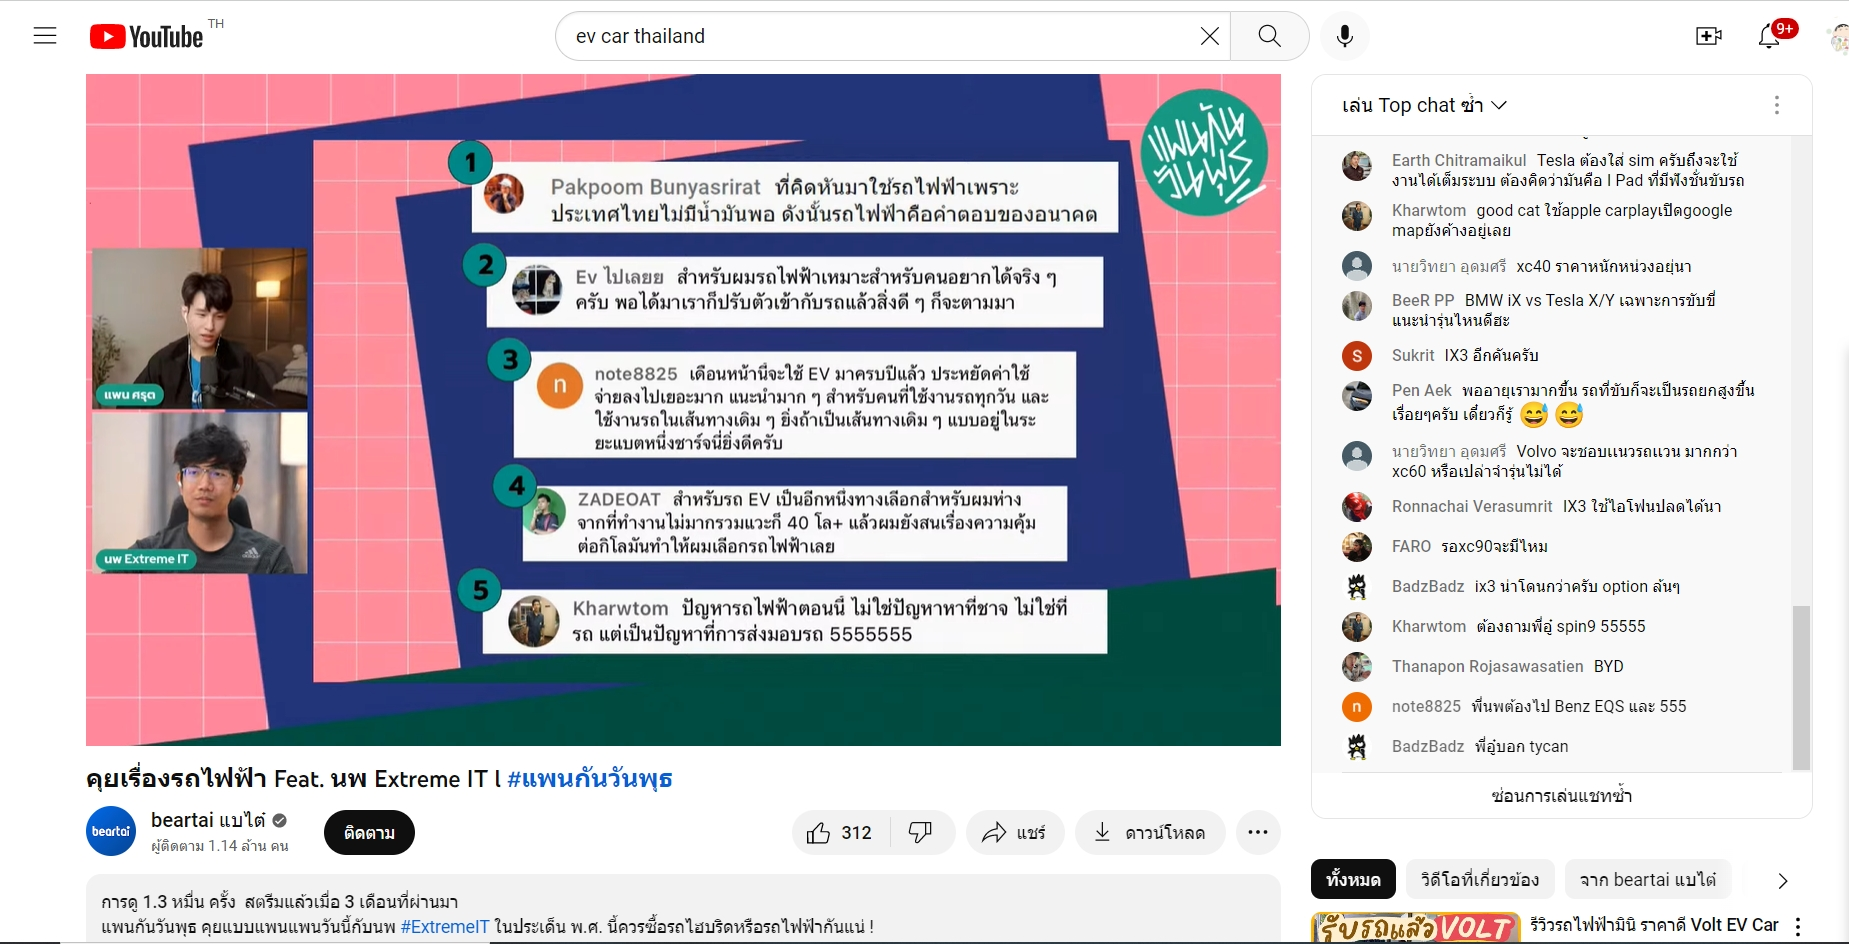

### Import data from CSV file

In [ ]:
#import data from CSV file 
import pandas as pd
import numpy as np

In [ ]:
df_youtube1 = pd.read_csv('https://raw.githubusercontent.com/Fahxzu/DADS5001_EVcar/main/data.csv')

### Explore data

In [ ]:
df_youtube1

,DateTime,Username,Comment
0,2022-09-28 12:39:46,Tanzineko,น.. นั่นเขาใช่มั้ย พี่นพ extreme IT
1,2022-09-28 12:44:08,Extreme IT,สวัสดีคร๊าบ
2,2022-09-28 12:53:55,beartai แบไต๋,#แพนกันวันพุธ วันนี้คุยกับคุณนพ #ExtremeIT ในป...
3,2022-09-28 12:58:15,Atchariya Mana,FC Extreme IT ค่าาา
4,2022-09-28 13:00:54,Sarawut Tum,สวัสดีครับ
...,...,...,...
253,2022-09-28 14:39:22,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...
254,2022-09-28 14:39:28,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...
255,2022-09-28 14:39:31,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...
256,2022-09-28 14:39:32,Pen Aek,วิ่งได้ระยะทาง 1000 โล ++ และราคาไม่เกินล้านบา...


In [ ]:
df_youtube1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  258 non-null    object
 1   Username  258 non-null    object
 2   Comment   258 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [ ]:
#check amount total >> people 
name = df_youtube1['Username'].unique()
print('amount of account username :',len(list(name))) #count username 
print('account username :\n',(name)) #username 

amount of account username : 78
account username :
 ['Tanzineko' 'Extreme IT' 'beartai แบไต๋' 'Atchariya Mana' 'Sarawut Tum'
 'Sritrung Sarawat' 'BeeR PP' 'Pen Aek' 'Piglet'
 'Thailand Flutist | Bunnaphat Tangpaiboon' 'อาจีเค เอฟเอฟ'
 'Aeramon Targaryan' 'Nutt89' 'Sam August' 'นายวิทยา อุดมศรี'
 'Thailand Game Show' 'Poowanai Pilachart' 'QwertyMen'
 'preecha pumrungreong' 'Pop Natthawut' 'PLD' 'Jekgabot' 'Sukrit'
 'POOH Jirasak' 'K_ataphon.y' 'ZADEOAT' 'Ae mam' 'JOTA' 'N R'
 'Danupol MItrut' 'ร้าน ป.อะไหล่ บุณฑริก' 'Watcharakon Sawangsri' 'มหานคร'
 'Pakpoom Bunyasrirat' 'SIRIKIAT KUSAKUL' 'Beckman Manbeck' 'Kharwtom'
 'Nathaphan Suriyasak' 'Krit Koon' 'teera noisakran' 'fender freez'
 'Thanakrit Inmaton' 'Artit Rungseerotsombat' 'Bell Exenon' 'Khampee Wang'
 'FARO' 'Ev ไปเลยย' 'Chinookie23' 'บริษัท เสริมสิน 1973 จํากัด'
 'Kittipong Apichatmaetee' 'Boat Natthapol' 'monster final' 'Sicksent'
 'Mr. Sunii' 'Tommy Ratanasevee' 'note8825' 'weerapong jadbunma'
 'Parkphoom Sriboonpan' 'MyGAIN'

### Try to identify commenter gender

In [ ]:
#create word 
# Sex of commenter
male_word = ['ครัช', 'คับ', 'คัช', 'ครับ', 'ผม', 'คร๊าฟ', 'ว่ะ', 'ค้าบ','เมีย','คร๊าบ','ฮะ','ครัมผม']
female_word = ['ค่ะ','คะ ','ค่า ','จ้า','นะค่ะ','ค่าาา','นะคะ']

df_sex1 = df_youtube1.copy() #Deep copy

# Try to identify commenter sex
#df_youtube[ 'Gender' ] = ''

df_sex1.loc[df_sex1['Comment'].str.contains('|'.join(female_word)) == True, "Gender"] = "Female"    #ตรวจสอบว่า ใน df_sex['Comment'] มี female_word ? 
df_sex1.loc[df_sex1['Comment'].str.contains('|'.join(male_word)) == True, "Gender"] = "Male"

df_sex1 = df_sex1.loc[:,['Username','Gender']]
df_sex1 = df_sex1.groupby(['Username'])['Gender'].agg(pd.Series.mode)
df_sex1 = df_sex1.apply(lambda y: np.nan if len(y)==0 else y)
df_sex1 = pd.DataFrame(data = df_sex1)

df_sex_count1 = df_sex1.groupby(['Gender'],dropna=False).size()
df_sex_count1 = pd.DataFrame(data = df_sex_count1)
df_sex_count1.columns = ['Number of user']

df_sex_count1
df_gender_count1 = df_sex_count1.reset_index()
df_gender_count1.columns = df_gender_count1.columns.str.replace('Sex', 'Gender')
df_gender_count1.iloc[2,0] = 'Cannot Define'
df_gender_count1.style.set_table_attributes("style='display:inline'").set_caption('Youtube topic : คุยเรื่องรถไฟฟ้า Feat.นพ Extreme IT')
#df_gender_count

,Gender,Number of user
0,Female,2
1,Male,54
2,Cannot Define,22


### Indentify keywords to separate comment opinion

In [ ]:
# Indentify keywords to separate comment opinion
# The content of the VDO is about many questions and uncertainties for EV, so overall the VDO represent the negative opinion for EV.
# Keyword opinion about ev car
q_word = ['ไหม', 'มั้ย', 'รู้ได้ไง', 'ปาาว', 'หรอ ', 'เร๊อะ', 'ไหน', 'ทำไม', 'ปล่าว', 'ป่าว', 'หรอครับ', 'ทำไง', 'ป่ะ', 'หรือยัง', 'มั้ง','กี่', 'เท่าไหร่', 'ล่ะ','ใช่มั้ย','ไหมครับ','ไหนครับ','ไหม๊','มุ้ย']
pos_word = ['เลือกev', 'เลือก ev', 'เลือก Ev', 'ใช้ EV', 'น่าใช้', 'ไฟฟ้าเท่านั้น', 'ซื้อไว้ใช้', 'กระแส EV', 'คนใช้ไม่บ่น', 
            'อยากได้', '🥺',	'ไม่หวังขาย', 'ไม่ได้หวังขาย', 'เปลี่ยนได้', 'ประหยัด', 'ค่าน้ำมัน', 'เทสล่า', 'พัฒนา', 'คุ้ม', 'ถูกกว่าน้ำมัน', 'รอรถev',
            'ไม่ได้ซื้อมาขาย', 'หลักความเป็นจริง', 'อนาคต', 'ซ่อมง่าย', 'ใช้ไฟฟ้า', 'ไม่มีความรู้', 'รถน้ำมันทำไม่ได้', 'เหมาะ', 'ซื้อ MG', 'ไฟฟ้า เรามีสำรองเกินพอ', 'ซื้อต่อรถสันดาปหรอ',
            'EV รอดยาว', 'ก็มีแล้ว', 'เปลี่ยนแบต', 'ชัด', 'ชาร์ทที่บ้านได้', 'เจ๊ง กันหมด', 'สามารถเปลี่ยนเบต', 'ซื้อรถหวังใช้', 'คนจะไปevกัน', 'มีคนใช้เริ่มเยอะ', '	พลังงานล้นหลาม',
            'earned from BYD', 'ไม่มองว่ารถ เป็นการลงทุน', 'รถน้ำมันขายได้กำไรกี่รุ่น', 'หวังสิ่งแวดล้อม', 'ไม่ขายต่อ', 'ฟังแบบมีสติ', 'EV ก็ต้องมาแทน', 'ซื้อนะev', 'ซื้อมาใช้', 'วัยรุ่นev',
            'รัฐบาล', 'นี่ขนาดไม่ควรลงทุน', 'ไม่เห็นมีใครเก็บโนเกีย', 'ยุโรปเค้าใช้มา', 'ตอนไอโฟนมาผมก็คิดแบบนี้', 'อัพแบตเตอรี่ ให้ได้ระยะทางเท่ากับรุ่นใหม่', 'นํ้ามันก็ราคาตกเหมือนกัน', 'ev ควรเป็นคันที่2',
            'อีกสิบปีรถน้ำมันจะห้ามวิ่งบนถนน', 'จุกจิกกว่าเยอะ', 'เว่อร์', 'ราคาคิดตามไฟบ้าน', 'ถูกกว่าแค่ 3เท่า', 'รถไฟฟ้ามันแอร์ไฟฟ้า', 'ถ้าเป็นไฟฟ้า ไม่ถึงพัน', 'เขามองในมุมมองในนักลงทุน', 'จะขับจนพังคามือ',
            'ถ้าคุณมีรถคันที่ 2 คุณจะคิดได้', 'เห็นต่าง', 'ค่าเขื่อเพลิง', 'ใช้อัพเกรด software', 'ชาร์จ 15-30 นาที ได้', 'ยังไม่ตอบโจทย์', 'ใครจะใช้น้ำมัน',
            'มองต่าง', '	เปลี่ยนแต่แบต', 'EV ครับ', 'คำตอบของ EV', 'เปลี่ยนทีละโมดูลได้', 'Ev ก็ชาร์จได้', 'ก็คงเลือก EV', 'มีคนขับ BYD ไปเชียงใหม่','ดีมาก','น่าสนใจ','น่าใช้','เกินไป','ความเงียบ']
neg_word = ['เสี่ยง','เลือกน้ำมัน', 'เลือก น้ำมัน', 'แพง', 'น้ำท่วม','ชอบ','เห็นด้วย', 'ราคาแรง', 'แบตเสื่อม', 'ใช่', 'พูดดี', 'agree', 
            'คิดเหมือนกัน', 'ไม่ได้ดีต่อสิ่งแวดล้อม', 'ไม่สะอาด', 'น้ำมันเช่นกัน', 'เห็นภาพ', 'น้ำมันสะดวก', 'แบตลูกละ', 'สมเหตุสมผล',
            'มองทะลุ', '🥰', 'ช่าย', 'ถูกที่สุด', 'ก็จริง', 'ยังไม่เหมาะ','คิดใหม่','ขายไม่ออก', 'ถูกครับ', 'ราคาแบต', 'มีเหตุผล', 'ไม่มีตัง', 'คิดเหมือน',
            'จัดการแบต', 'ใช้รถน้ำมัน', 'เสื่อม', 'เติมน้ำมัน', 'ไม่พอ', 'รถน้ำมันยังคุ้มกว่า', 'ราคาน้ำมัน', 'ต่างจังหวัด', 'ร้อน', 'ไฮโดรเจน', 'ลำบาก',
            'ขายไม่ได้', 'ใช้เวลา', 'นิดเดียว', 'กระแส', 'ข้อจำกัด', 'ต้องขาย', 'น้ำมันคับ', 'เสียเวลา', 'คิดว่าขึ้นไปเรื่อย', '3 วัน 1200.- คะ ต้องเปลี่ยน', 'cycleน้อยลง',
            'ใช้สันดาป', 'ทุกอย่างจบ', 'ความคิดคือดี', 'ไม่ได้คิดถึงเลย', 'เฉียบขาด', 'มอเตอร์ก็มีอายุการใช้งาน', 'ตัดสินใจได้ง่ายขึ้น', 'มีประโยชน์มาก', 'เซอวิส EV', 'ปั๊มน้ำมันก็มีอยู่ทุกหนทุกแห่ง',
            'ยังไม่ได้ตอบโจทย์', 'โรงไฟฟ้าก็ใช้ถ่านหิน', 'คิดแบบนี้เหมือนกัน', 'กำลังตัดสินใจ', 'จริง', 'ตกรุ่น', 'ถูกต้อง', 'มองขาด', 'เลือกรถน้ำมัน', 'Yes', 'ตอนนี้ไม่ซื้อแน่ๆ', 'มันยังไม่สะดวก',
            'รถใช้น้ำมันผมซ่อมเองได้', 'ชะลอการผลิต', 'คันเร่งรถไฟฟ้าค้าง', 'อันนี้น่าคิด', 'ปลอบใจตัวเองในกลุ่มEV', 'กลับมาใช้สันดาบ', 'ยังไงก็รถน้ำมัน', 'น่าคิด', 'จิง', 'ขอบคุณสำหรับความคิด', 'Ev ไม่เท่ากับพลังงานสะอาด',
            'หนูทดลอง', 'เคยเจ็บหนักจากรถ CNG', 'ยังไม่กล้าEV', 'รถไฟฟ้าการขับอารมณ์มันต่างกับรถเครื่องสันดาบ', 'ไฟฟ้าซื้อสดจากโรงไฟฟ้า', 'ถ้าเป็นน้ำมันสองพันขึ้น', 'รถของเล่น', 'ค่าตัวบวกไปแล้ว', 'มุมมองสุดยอด',
            'ตาสว่าง', 'ไม่ต้องห่วง ว่าไฟฟ้าหมด', 'ค่าไฟขึ้น', 'ข้อคิดดีมาก', 'ติดดอย', 'ยอดเยี่ยมเสมอ', 'มุมมองที่น่าสนใจ', 'เริส', 'วิสัยทัศน์เยี่ยม', 'evผ่อนหมดรถพัง', 'ปั๊มน้ำมันก็ยังมีอยู่ทุกที่', 'ยังคงผลประโยชน์เรื่องน้ำมัน',
            'ซื้อรถใช้แก็ส', 'เลือก ฟอร์ด เรนเจอร์', 'สุดยอด', 'เราก็ติดแบบนี้', 'ประกันตีซาก', 'รถน้ำมันจ้า' , 'ค่าแบตเท่าไร', 'แง่คิดที่ดี', 'ค่าไฟ จะขึ้น', 'ตรงใจ', 'ถูกใจ', 'สุดยอด', 'ฉลาด', 'แบตเตอรี่ลูกละ หกแสนกว่า',
            'เวลาขายต่อมันเจ็บน้อยกว่า', 'น้ำมันยังใช้ได้อีกนาน', 'จะได้เหยียบไม่สนโลกน้ำมันถูก', 'ชาร์จกลางทางไม่ไหว', 'ขึ้นค่าไฟ', 'Ev ก็ใช้พลังงานที่มาจากน้ำมัน-แก็ส','บ้านเรายังต้องซื้อไฟฟ้าจากพม่า จากลาวอยู่เลย','อย่าเพิ่งซื้อ',
            'เจอปัญหา','ชาร์จยาก','ไม่เพียงพอ','กลัวไฟช็อต']


### Remove irrelavent comments

In [ ]:
df_comment_text = df_youtube1.copy()

#Remove tag to other accounts comment
count_remove_tagcomment1 = len(df_comment_text[df_comment_text.loc[:,'Comment'].str.contains('@')])
print("No. of removed comments that only have a tag to other account content = ", count_remove_tagcomment1)

df_comment_text = df_comment_text[df_comment_text.loc[:,"Comment"].str.contains('|'.join('@'), regex=False) != True]
display(df_comment_text)

No. of removed comments that only have a tag to other account content =  4


,DateTime,Username,Comment
0,2022-09-28 12:39:46,Tanzineko,น.. นั่นเขาใช่มั้ย พี่นพ extreme IT
1,2022-09-28 12:44:08,Extreme IT,สวัสดีคร๊าบ
2,2022-09-28 12:53:55,beartai แบไต๋,#แพนกันวันพุธ วันนี้คุยกับคุณนพ #ExtremeIT ในป...
3,2022-09-28 12:58:15,Atchariya Mana,FC Extreme IT ค่าาา
4,2022-09-28 13:00:54,Sarawut Tum,สวัสดีครับ
...,...,...,...
253,2022-09-28 14:39:22,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...
254,2022-09-28 14:39:28,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...
255,2022-09-28 14:39:31,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...
256,2022-09-28 14:39:32,Pen Aek,วิ่งได้ระยะทาง 1000 โล ++ และราคาไม่เกินล้านบา...


### Find keywords in comments to categorize

In [ ]:
#Matching any of the words
#Curious/Asking comments
pattern = r'{}|\?'.format('|'.join(q_word)) # Also find '?' (special character) in the comments
df_comment_text.loc[:,'Q'] = df_comment_text.loc[:,'Comment'].str.count(pattern)
#exclude word 'ไหม่','ไหม้'
df_comment_text.loc[df_comment_text.loc[:,'Comment'].str.contains('|'.join(['ไหม่','ไหม้', 'ทำไม่']))== True,'Q'] = 0 
print(pattern)

#Negative Opinion comments about EV
pattern = r'{}/+1'.format('|'.join(neg_word))
df_comment_text.loc[:,'Neg'] = df_comment_text.loc[:,'Comment'].str.count(pattern)
df_comment_text.loc[df_comment_text.loc[:,'Comment']== 'ev','Q'] = 1 # For comment only have 'ev' word
#print(pattern)

#Positive Opinion comments about EV
pattern = r'{}'.format('|'.join(pos_word))
df_comment_text.loc[:,'Pos'] = df_comment_text.loc[:,'Comment'].str.count(pattern)
#print(pattern)

df_comment_text

ไหม|มั้ย|รู้ได้ไง|ปาาว|หรอ |เร๊อะ|ไหน|ทำไม|ปล่าว|ป่าว|หรอครับ|ทำไง|ป่ะ|หรือยัง|มั้ง|กี่|เท่าไหร่|ล่ะ|ใช่มั้ย|ไหมครับ|ไหนครับ|ไหม๊|มุ้ย|\?


,DateTime,Username,Comment,Q,Neg,Pos
0,2022-09-28 12:39:46,Tanzineko,น.. นั่นเขาใช่มั้ย พี่นพ extreme IT,1,1,0
1,2022-09-28 12:44:08,Extreme IT,สวัสดีคร๊าบ,0,0,0
2,2022-09-28 12:53:55,beartai แบไต๋,#แพนกันวันพุธ วันนี้คุยกับคุณนพ #ExtremeIT ในป...,0,0,0
3,2022-09-28 12:58:15,Atchariya Mana,FC Extreme IT ค่าาา,0,0,0
4,2022-09-28 13:00:54,Sarawut Tum,สวัสดีครับ,0,0,0
...,...,...,...,...,...,...
253,2022-09-28 14:39:22,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0
254,2022-09-28 14:39:28,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0
255,2022-09-28 14:39:31,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0
256,2022-09-28 14:39:32,Pen Aek,วิ่งได้ระยะทาง 1000 โล ++ และราคาไม่เกินล้านบา...,0,0,0


#### For comments that has 0 on 'Q', 'Neg', and 'Pos' assgin 'Neu' = 1

In [ ]:
df_comment_text.loc[(df_comment_text['Q']==0) & (df_comment_text['Neg']==0) & (df_comment_text['Pos']==0), "Neu"] = 1
df_comment_text['Neu'] = df_comment_text['Neu'].fillna(0)
df_comment_text.loc[df_comment_text["Neu"]== 1] 

,DateTime,Username,Comment,Q,Neg,Pos,Neu
1,2022-09-28 12:44:08,Extreme IT,สวัสดีคร๊าบ,0,0,0,1.0
2,2022-09-28 12:53:55,beartai แบไต๋,#แพนกันวันพุธ วันนี้คุยกับคุณนพ #ExtremeIT ในป...,0,0,0,1.0
3,2022-09-28 12:58:15,Atchariya Mana,FC Extreme IT ค่าาา,0,0,0,1.0
4,2022-09-28 13:00:54,Sarawut Tum,สวัสดีครับ,0,0,0,1.0
5,2022-09-28 13:01:09,Sarawut Tum,ผมใหม่อะไรใหม่,0,0,0,1.0
...,...,...,...,...,...,...,...
253,2022-09-28 14:39:22,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
254,2022-09-28 14:39:28,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
255,2022-09-28 14:39:31,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
256,2022-09-28 14:39:32,Pen Aek,วิ่งได้ระยะทาง 1000 โล ++ และราคาไม่เกินล้านบา...,0,0,0,1.0


In [ ]:
df_opi = df_comment_text.sum(axis=0)  #total_comment

In [ ]:
df_opi

DateTime    2022-09-28 12:39:462022-09-28 12:44:082022-09-...
Username    TanzinekoExtreme ITbeartai แบไต๋Atchariya Mana...
Comment     น.. นั่นเขาใช่มั้ย พี่นพ extreme ITสวัสดีคร๊าบ...
Q                                                          97
Neg                                                        45
Pos                                                        40
Neu                                                     137.0
dtype: object

### Check the comments that have not been categorized by the Pos & Neg keywords

In [ ]:
#check
df1 = df_comment_text[(df_comment_text['Q']==0) & (df_comment_text['Neg']==0) & (df_comment_text['Pos']==0)]
#df = df.loc[:,['Comment_Text']]
df1

,DateTime,Username,Comment,Q,Neg,Pos,Neu
1,2022-09-28 12:44:08,Extreme IT,สวัสดีคร๊าบ,0,0,0,1.0
2,2022-09-28 12:53:55,beartai แบไต๋,#แพนกันวันพุธ วันนี้คุยกับคุณนพ #ExtremeIT ในป...,0,0,0,1.0
3,2022-09-28 12:58:15,Atchariya Mana,FC Extreme IT ค่าาา,0,0,0,1.0
4,2022-09-28 13:00:54,Sarawut Tum,สวัสดีครับ,0,0,0,1.0
5,2022-09-28 13:01:09,Sarawut Tum,ผมใหม่อะไรใหม่,0,0,0,1.0
...,...,...,...,...,...,...,...
253,2022-09-28 14:39:22,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
254,2022-09-28 14:39:28,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
255,2022-09-28 14:39:31,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
256,2022-09-28 14:39:32,Pen Aek,วิ่งได้ระยะทาง 1000 โล ++ และราคาไม่เกินล้านบา...,0,0,0,1.0


#### Find the words that used frequently to add in keyword list

In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pythainlp

In [ ]:
from pythainlp import word_tokenize
from collections import Counter

set_word = set()
lst_word = []
for text in df1.loc[:,'Comment']:
  words = word_tokenize(text, keep_whitespace=False, engine="longest")
  for word in words:
    lst_word.append(word)
    #set_w.add( word )

dic = dict(Counter(lst_word))
df_wc1 = pd.DataFrame(dic.items(), columns=['words', 'count'])
df_wc1 = df_wc1.sort_values('count', ascending=False)


In [ ]:
df_wc1[df_wc1['count']>10]

,words,count
53,_,190
51,:,66
73,::,59
55,face,53
71,with,52
30,ครับ,36
52,grinning,36
72,sweat,34
156,ได้,29
112,คับ,28


## Video 3 
Searching the video in Youtube using keyword as "รถยนต์ไฟฟ้าข้อดีข้อเสีย" (to get the Thai video) the result as below :


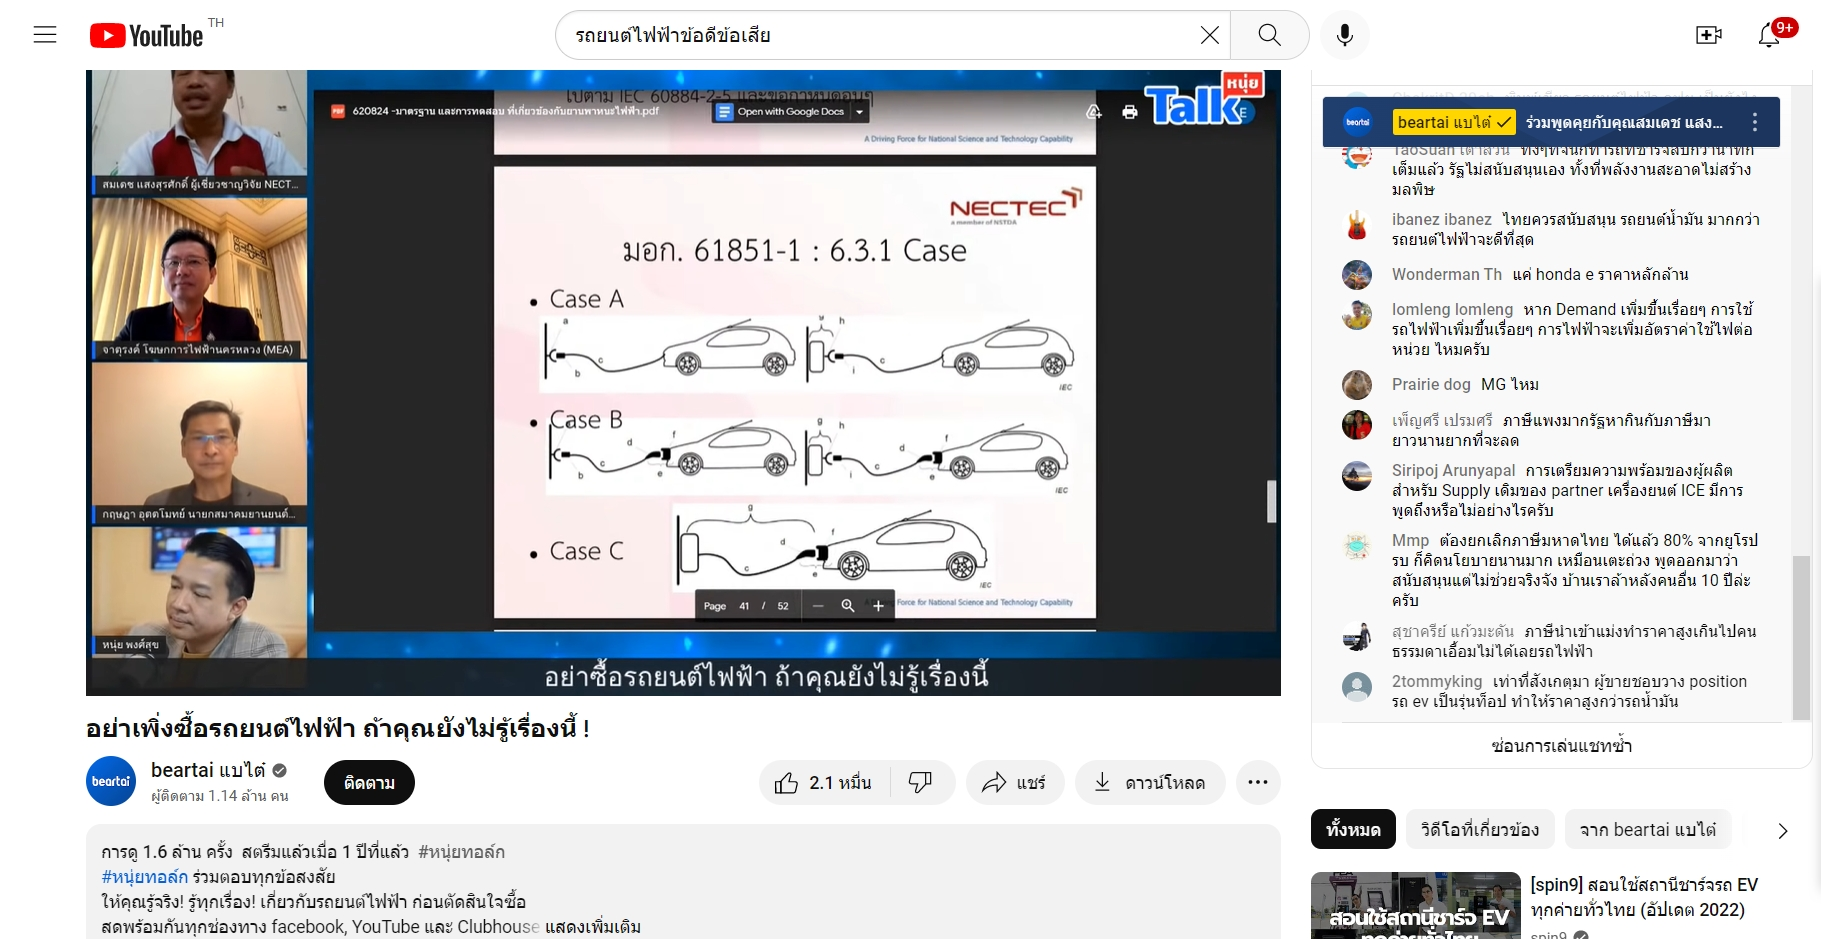

### Import data from CSV file

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_youtube2 = pd.read_csv('https://raw.githubusercontent.com/Fahxzu/DADS5001_EVcar/main/comment%20data.csv')

### Explore data

In [ ]:
df_youtube2

,DateTime,Username,Comment
0,2021-08-08 01:30:58,Oni V,Hello :waving_hand:
1,2021-08-08 02:26:17,beartai แบไต๋,#หนุ่ยทอล์ก ร่วมตอบทุกข้อสงสัยให้คุณรู้จริง! ร...
2,2021-08-08 02:30:50,S_Cha,super fast ทำให้ Battery เสื่อมไวไหมครับ
3,2021-08-08 02:43:39,สุรเมษ หนึ่งครับ,บ้านเรายังต้องซื้อไฟฟ้าจากพม่า จากลาวอยู่เลย
4,2021-08-08 02:49:18,Love love,ถ้ายังไม่มีตังค์...อย่าเพิ่งซื้อ
...,...,...,...
127,2021-08-08 04:00:40,Jadenuchid Wutsutthikorn,จะมี MG HS BEV ไหม๊
128,2021-08-08 04:00:45,Thanee,คนไทย ไม่ได้กินหญ้า นะเฟ้ย
129,2021-08-08 04:01:25,Suwit Pol-armart,ยินดีให้คำแนะนำที่ถูกต้อง ในแง่อาคารชุดครับ ก่...
130,2021-08-08 04:01:44,Hikaru NoSai,Club house ช่องไหนครับ


In [ ]:
df_youtube2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  132 non-null    object
 1   Username  132 non-null    object
 2   Comment   132 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


In [ ]:
#check amount total >> people 
name2 = df_youtube2['Username'].unique()
print('amount of account username :',len(list(name2))) #count username 
print('account username :',(name2)) #username 

amount of account username : 82
account username : ['Oni V' 'beartai แบไต๋' 'S_Cha' 'สุรเมษ หนึ่งครับ' 'Love love'
 'SripraeYa' '๋JIB Home Alone' 'Supertonnum' 'พีพี various เกมส์'
 'mrgergos' 'Thungpang' 'komin ferng' 'Nuttaphat Huayudomsin'
 'Nithach Vassanapong' 'JustVibeEgg' 'Catherine global' 'Songpol Peak Kub'
 'maxpkc' 'RPM135' 'Peter Non' 'beauty สาวสวย tiktok'
 'Chaiyasit Laowichuwakornnukul' 'Tommy Ratanasevee' '2tommyking'
 'maythee lhekthed' 'DEER_R R' 'Sritrung Sarawat' 'ittikorn' 'yunim477'
 'Dha Nik' 'Amane Ojakasa' 'Nuttapon Sangjumpa' 'Titipong Chirakorntrakul'
 'Natta A.' 'robin nr' 'ศักดิ์ดา วันดึก' 'Piya Yuanpant' 'LightningCLI'
 'Prairie dog' 'SUPIN T.PAK.D' 'Thitithach Tongdonyod' 'เอกพล รัตนสูตร์'
 'Nonoe Veronica' 'ongart tanasirirak' 'TaoSuan เต้าส่วน' 'Nut Junghok'
 'ภีมภณ มณีธร' 'เพ็ญศรี เปรมศรี' 'mrbig2012' 'KhunJay Cheerapong'
 'ChakritD 29ch' 'ibanez ibanez' 'Wonderman Th' 'lomleng lomleng'
 'Siripoj Arunyapal' 'Mmp' 'สุชาครีย์ แก้วมะดัน' 'Artisha Pinitpuw

### Try to identify commenter gender

In [ ]:
#create word 
# Sex of commenter
male_word = ['ครัช', 'คับ', 'คัช', 'ครับ', 'ผม', 'คร๊าฟ', 'ว่ะ', 'ค้าบ','เมีย','คร๊าบ','ฮะ','ครัมผม']
female_word = ['ค่ะ','คะ ','ค่า ','จ้า','นะค่ะ','ค่าาา','นะคะ']

df_sex2 = df_youtube2.copy() #Deep copy

# Try to identify commenter sex
#df_youtube[ 'Gender' ] = ''

df_sex2.loc[df_sex2['Comment'].str.contains('|'.join(female_word)) == True, "Gender"] = "Female"    #ตรวจสอบว่า ใน df_sex['Comment'] มี female_word ? 
df_sex2.loc[df_sex2['Comment'].str.contains('|'.join(male_word)) == True, "Gender"] = "Male"

df_sex2 = df_sex2.loc[:,['Username','Gender']]
df_sex2 = df_sex2.groupby(['Username'])['Gender'].agg(pd.Series.mode)
df_sex2 = df_sex2.apply(lambda y: np.nan if len(y)==0 else y)
df_sex2 = pd.DataFrame(data = df_sex2)

df_sex_count2 = df_sex2.groupby(['Gender'],dropna=False).size()
df_sex_count2 = pd.DataFrame(data = df_sex_count2)
df_sex_count2.columns = ['Number of user']

df_sex_count2
df_gender_count2 = df_sex_count2.reset_index()
df_gender_count2.columns = df_gender_count2.columns.str.replace('Sex', 'Gender')
df_gender_count2.iloc[2,0] = 'Cannot Define'
df_gender_count2.style.set_table_attributes("style='display:inline'").set_caption('Youtube topic : อย่าเพิ่งซื้อรถยนต์ไฟฟ้า ถ้าคุณยังไม่รู้เรื่องนี้ !')
#df_gender_count

,Gender,Number of user
0,Female,3
1,Male,49
2,Cannot Define,30


### Indentify keywords to separate comment opinion

In [ ]:
# Indentify keywords to separate comment opinion
# The content of the VDO is about many questions and uncertainties for EV, so overall the VDO represent the negative opinion for EV.
# Keyword opinion about ev car
q_word = ['ไหม', 'มั้ย', 'รู้ได้ไง', 'ปาาว', 'หรอ ', 'เร๊อะ', 'ไหน', 'ทำไม', 'ปล่าว', 'ป่าว', 'หรอครับ', 'ทำไง', 'ป่ะ', 'หรือยัง', 'มั้ง','กี่', 'เท่าไหร่', 'ล่ะ','ใช่มั้ย','ไหมครับ','ไหนครับ','ไหม๊','มุ้ย']
pos_word = ['เลือกev', 'เลือก ev', 'เลือก Ev', 'ใช้ EV', 'น่าใช้', 'ไฟฟ้าเท่านั้น', 'ซื้อไว้ใช้', 'กระแส EV', 'คนใช้ไม่บ่น', 
            'อยากได้', '🥺',	'ไม่หวังขาย', 'ไม่ได้หวังขาย', 'เปลี่ยนได้', 'ประหยัด', 'ค่าน้ำมัน', 'เทสล่า', 'พัฒนา', 'คุ้ม', 'ถูกกว่าน้ำมัน', 'รอรถev',
            'ไม่ได้ซื้อมาขาย', 'หลักความเป็นจริง', 'อนาคต', 'ซ่อมง่าย', 'ใช้ไฟฟ้า', 'ไม่มีความรู้', 'รถน้ำมันทำไม่ได้', 'เหมาะ', 'ซื้อ MG', 'ไฟฟ้า เรามีสำรองเกินพอ', 'ซื้อต่อรถสันดาปหรอ',
            'EV รอดยาว', 'ก็มีแล้ว', 'เปลี่ยนแบต', 'ชัด', 'ชาร์ทที่บ้านได้', 'เจ๊ง กันหมด', 'สามารถเปลี่ยนเบต', 'ซื้อรถหวังใช้', 'คนจะไปevกัน', 'มีคนใช้เริ่มเยอะ', '	พลังงานล้นหลาม',
            'earned from BYD', 'ไม่มองว่ารถ เป็นการลงทุน', 'รถน้ำมันขายได้กำไรกี่รุ่น', 'หวังสิ่งแวดล้อม', 'ไม่ขายต่อ', 'ฟังแบบมีสติ', 'EV ก็ต้องมาแทน', 'ซื้อนะev', 'ซื้อมาใช้', 'วัยรุ่นev',
            'รัฐบาล', 'นี่ขนาดไม่ควรลงทุน', 'ไม่เห็นมีใครเก็บโนเกีย', 'ยุโรปเค้าใช้มา', 'ตอนไอโฟนมาผมก็คิดแบบนี้', 'อัพแบตเตอรี่ ให้ได้ระยะทางเท่ากับรุ่นใหม่', 'นํ้ามันก็ราคาตกเหมือนกัน', 'ev ควรเป็นคันที่2',
            'อีกสิบปีรถน้ำมันจะห้ามวิ่งบนถนน', 'จุกจิกกว่าเยอะ', 'เว่อร์', 'ราคาคิดตามไฟบ้าน', 'ถูกกว่าแค่ 3เท่า', 'รถไฟฟ้ามันแอร์ไฟฟ้า', 'ถ้าเป็นไฟฟ้า ไม่ถึงพัน', 'เขามองในมุมมองในนักลงทุน', 'จะขับจนพังคามือ',
            'ถ้าคุณมีรถคันที่ 2 คุณจะคิดได้', 'เห็นต่าง', 'ค่าเขื่อเพลิง', 'ใช้อัพเกรด software', 'ชาร์จ 15-30 นาที ได้', 'ยังไม่ตอบโจทย์', 'ใครจะใช้น้ำมัน',
            'มองต่าง', '	เปลี่ยนแต่แบต', 'EV ครับ', 'คำตอบของ EV', 'เปลี่ยนทีละโมดูลได้', 'Ev ก็ชาร์จได้', 'ก็คงเลือก EV', 'มีคนขับ BYD ไปเชียงใหม่','ดีมาก','น่าสนใจ','น่าใช้','เกินไป','ความเงียบ']
neg_word = ['เสี่ยง','เลือกน้ำมัน', 'เลือก น้ำมัน', 'แพง', 'น้ำท่วม','ชอบ','เห็นด้วย', 'ราคาแรง', 'แบตเสื่อม', 'ใช่', 'พูดดี', 'agree', 
            'คิดเหมือนกัน', 'ไม่ได้ดีต่อสิ่งแวดล้อม', 'ไม่สะอาด', 'น้ำมันเช่นกัน', 'เห็นภาพ', 'น้ำมันสะดวก', 'แบตลูกละ', 'สมเหตุสมผล',
            'มองทะลุ', '🥰', 'ช่าย', 'ถูกที่สุด', 'ก็จริง', 'ยังไม่เหมาะ','คิดใหม่','ขายไม่ออก', 'ถูกครับ', 'ราคาแบต', 'มีเหตุผล', 'ไม่มีตัง', 'คิดเหมือน',
            'จัดการแบต', 'ใช้รถน้ำมัน', 'เสื่อม', 'เติมน้ำมัน', 'ไม่พอ', 'รถน้ำมันยังคุ้มกว่า', 'ราคาน้ำมัน', 'ต่างจังหวัด', 'ร้อน', 'ไฮโดรเจน', 'ลำบาก',
            'ขายไม่ได้', 'ใช้เวลา', 'นิดเดียว', 'กระแส', 'ข้อจำกัด', 'ต้องขาย', 'น้ำมันคับ', 'เสียเวลา', 'คิดว่าขึ้นไปเรื่อย', '3 วัน 1200.- คะ ต้องเปลี่ยน', 'cycleน้อยลง',
            'ใช้สันดาป', 'ทุกอย่างจบ', 'ความคิดคือดี', 'ไม่ได้คิดถึงเลย', 'เฉียบขาด', 'มอเตอร์ก็มีอายุการใช้งาน', 'ตัดสินใจได้ง่ายขึ้น', 'มีประโยชน์มาก', 'เซอวิส EV', 'ปั๊มน้ำมันก็มีอยู่ทุกหนทุกแห่ง',
            'ยังไม่ได้ตอบโจทย์', 'โรงไฟฟ้าก็ใช้ถ่านหิน', 'คิดแบบนี้เหมือนกัน', 'กำลังตัดสินใจ', 'จริง', 'ตกรุ่น', 'ถูกต้อง', 'มองขาด', 'เลือกรถน้ำมัน', 'Yes', 'ตอนนี้ไม่ซื้อแน่ๆ', 'มันยังไม่สะดวก',
            'รถใช้น้ำมันผมซ่อมเองได้', 'ชะลอการผลิต', 'คันเร่งรถไฟฟ้าค้าง', 'อันนี้น่าคิด', 'ปลอบใจตัวเองในกลุ่มEV', 'กลับมาใช้สันดาบ', 'ยังไงก็รถน้ำมัน', 'น่าคิด', 'จิง', 'ขอบคุณสำหรับความคิด', 'Ev ไม่เท่ากับพลังงานสะอาด',
            'หนูทดลอง', 'เคยเจ็บหนักจากรถ CNG', 'ยังไม่กล้าEV', 'รถไฟฟ้าการขับอารมณ์มันต่างกับรถเครื่องสันดาบ', 'ไฟฟ้าซื้อสดจากโรงไฟฟ้า', 'ถ้าเป็นน้ำมันสองพันขึ้น', 'รถของเล่น', 'ค่าตัวบวกไปแล้ว', 'มุมมองสุดยอด',
            'ตาสว่าง', 'ไม่ต้องห่วง ว่าไฟฟ้าหมด', 'ค่าไฟขึ้น', 'ข้อคิดดีมาก', 'ติดดอย', 'ยอดเยี่ยมเสมอ', 'มุมมองที่น่าสนใจ', 'เริส', 'วิสัยทัศน์เยี่ยม', 'evผ่อนหมดรถพัง', 'ปั๊มน้ำมันก็ยังมีอยู่ทุกที่', 'ยังคงผลประโยชน์เรื่องน้ำมัน',
            'ซื้อรถใช้แก็ส', 'เลือก ฟอร์ด เรนเจอร์', 'สุดยอด', 'เราก็ติดแบบนี้', 'ประกันตีซาก', 'รถน้ำมันจ้า' , 'ค่าแบตเท่าไร', 'แง่คิดที่ดี', 'ค่าไฟ จะขึ้น', 'ตรงใจ', 'ถูกใจ', 'สุดยอด', 'ฉลาด', 'แบตเตอรี่ลูกละ หกแสนกว่า',
            'เวลาขายต่อมันเจ็บน้อยกว่า', 'น้ำมันยังใช้ได้อีกนาน', 'จะได้เหยียบไม่สนโลกน้ำมันถูก', 'ชาร์จกลางทางไม่ไหว', 'ขึ้นค่าไฟ', 'Ev ก็ใช้พลังงานที่มาจากน้ำมัน-แก็ส','บ้านเรายังต้องซื้อไฟฟ้าจากพม่า จากลาวอยู่เลย','อย่าเพิ่งซื้อ',
            'เจอปัญหา','ชาร์จยาก','ไม่เพียงพอ','กลัวไฟช็อต']


### Remove irrelavent comments

In [ ]:
df_comment_text2 = df_youtube2.copy()

#Remove tag to other accounts comment
count_remove_tagcomment2 = len(df_comment_text2[df_comment_text2.loc[:,'Comment'].str.contains('@')])
print("No. of removed comments that only have a tag to other account content = ", count_remove_tagcomment2)

df_comment_text2 = df_comment_text2[df_comment_text2.loc[:,"Comment"].str.contains('|'.join('@'), regex=False) != True]
display(df_comment_text2)

No. of removed comments that only have a tag to other account content =  3


,DateTime,Username,Comment
0,2021-08-08 01:30:58,Oni V,Hello :waving_hand:
1,2021-08-08 02:26:17,beartai แบไต๋,#หนุ่ยทอล์ก ร่วมตอบทุกข้อสงสัยให้คุณรู้จริง! ร...
2,2021-08-08 02:30:50,S_Cha,super fast ทำให้ Battery เสื่อมไวไหมครับ
3,2021-08-08 02:43:39,สุรเมษ หนึ่งครับ,บ้านเรายังต้องซื้อไฟฟ้าจากพม่า จากลาวอยู่เลย
4,2021-08-08 02:49:18,Love love,ถ้ายังไม่มีตังค์...อย่าเพิ่งซื้อ
...,...,...,...
127,2021-08-08 04:00:40,Jadenuchid Wutsutthikorn,จะมี MG HS BEV ไหม๊
128,2021-08-08 04:00:45,Thanee,คนไทย ไม่ได้กินหญ้า นะเฟ้ย
129,2021-08-08 04:01:25,Suwit Pol-armart,ยินดีให้คำแนะนำที่ถูกต้อง ในแง่อาคารชุดครับ ก่...
130,2021-08-08 04:01:44,Hikaru NoSai,Club house ช่องไหนครับ


### Find keywords in comments to categorize

In [ ]:
#Matching any of the words
#Curious/Asking comments
pattern = r'{}|\?'.format('|'.join(q_word)) # Also find '?' (special character) in the comments
df_comment_text2.loc[:,'Q'] = df_comment_text2.loc[:,'Comment'].str.count(pattern)
#exclude word 'ไหม่','ไหม้'
df_comment_text2.loc[df_comment_text2.loc[:,'Comment'].str.contains('|'.join(['ไหม่','ไหม้', 'ทำไม่']))== True,'Q'] = 0 
print(pattern)

#Negative Opinion comments about EV
pattern = r'{}/+1'.format('|'.join(neg_word))
df_comment_text2.loc[:,'Neg'] = df_comment_text2.loc[:,'Comment'].str.count(pattern)
df_comment_text2.loc[df_comment_text2.loc[:,'Comment']== 'ev','Q'] = 1 # For comment only have 'ev' word
#print(pattern)

#Positive Opinion comments about EV
pattern = r'{}'.format('|'.join(pos_word))
df_comment_text2.loc[:,'Pos'] = df_comment_text2.loc[:,'Comment'].str.count(pattern)
#print(pattern)

df_comment_text2

ไหม|มั้ย|รู้ได้ไง|ปาาว|หรอ |เร๊อะ|ไหน|ทำไม|ปล่าว|ป่าว|หรอครับ|ทำไง|ป่ะ|หรือยัง|มั้ง|กี่|เท่าไหร่|ล่ะ|ใช่มั้ย|ไหมครับ|ไหนครับ|ไหม๊|มุ้ย|\?


,DateTime,Username,Comment,Q,Neg,Pos
0,2021-08-08 01:30:58,Oni V,Hello :waving_hand:,0,0,0
1,2021-08-08 02:26:17,beartai แบไต๋,#หนุ่ยทอล์ก ร่วมตอบทุกข้อสงสัยให้คุณรู้จริง! ร...,1,1,0
2,2021-08-08 02:30:50,S_Cha,super fast ทำให้ Battery เสื่อมไวไหมครับ,1,1,0
3,2021-08-08 02:43:39,สุรเมษ หนึ่งครับ,บ้านเรายังต้องซื้อไฟฟ้าจากพม่า จากลาวอยู่เลย,0,1,0
4,2021-08-08 02:49:18,Love love,ถ้ายังไม่มีตังค์...อย่าเพิ่งซื้อ,0,2,0
...,...,...,...,...,...,...
127,2021-08-08 04:00:40,Jadenuchid Wutsutthikorn,จะมี MG HS BEV ไหม๊,1,0,0
128,2021-08-08 04:00:45,Thanee,คนไทย ไม่ได้กินหญ้า นะเฟ้ย,0,0,0
129,2021-08-08 04:01:25,Suwit Pol-armart,ยินดีให้คำแนะนำที่ถูกต้อง ในแง่อาคารชุดครับ ก่...,0,1,0
130,2021-08-08 04:01:44,Hikaru NoSai,Club house ช่องไหนครับ,1,0,0


#### For comments that has 0 on 'Q', 'Neg', and 'Pos' assgin 'Neu' = 1

In [ ]:
df_comment_text2.loc[(df_comment_text2['Q']==0) & (df_comment_text2['Neg']==0) & (df_comment_text2['Pos']==0), "Neu"] = 1
df_comment_text2['Neu'] = df_comment_text2['Neu'].fillna(0)
df_comment_text2.loc[df_comment_text2["Neu"]== 1] 

,DateTime,Username,Comment,Q,Neg,Pos,Neu
0,2021-08-08 01:30:58,Oni V,Hello :waving_hand:,0,0,0,1.0
5,2021-08-08 03:01:02,SripraeYa,อยู่คอนโดทำยังไงคะ ยังไม่มีพวกที่ชาร์จเลย ทางน...,0,0,0,1.0
6,2021-08-08 03:01:07,๋JIB Home Alone,อรุณสวัสดิ์ครับคุณหนุ่ย,0,0,0,1.0
7,2021-08-08 03:02:32,Supertonnum,สวัสดีครับ,0,0,0,1.0
8,2021-08-08 03:03:01,พีพี various เกมส์,สวัสดีครับ,0,0,0,1.0
...,...,...,...,...,...,...,...
122,2021-08-08 04:00:06,beartai แบไต๋,ไปคุยต่อกันที่ Clubhouse นะครับhttps://www.clu...,0,0,0,1.0
125,2021-08-08 04:00:32,mrbig2012,ทุกวันนี้ใช้สกูตเตอร์ไฟฟ้าอยู่แฮปปี้กับมันมาก ...,0,0,0,1.0
126,2021-08-08 04:00:38,Suwit Pol-armart,ท่านที่จากการไฟฟ้า ใจเย็นนิด ต้องดูเรื่องกฎหมา...,0,0,0,1.0
128,2021-08-08 04:00:45,Thanee,คนไทย ไม่ได้กินหญ้า นะเฟ้ย,0,0,0,1.0


### Check the comments that have not been categorized by the Pos & Neg keywords

In [ ]:
#check
df2 = df_comment_text2[(df_comment_text2['Q']==0) & (df_comment_text2['Neg']==0) & (df_comment_text2['Pos']==0)]
#df = df.loc[:,['Comment_Text']]
df2

,DateTime,Username,Comment,Q,Neg,Pos,Neu
0,2021-08-08 01:30:58,Oni V,Hello :waving_hand:,0,0,0,1.0
5,2021-08-08 03:01:02,SripraeYa,อยู่คอนโดทำยังไงคะ ยังไม่มีพวกที่ชาร์จเลย ทางน...,0,0,0,1.0
6,2021-08-08 03:01:07,๋JIB Home Alone,อรุณสวัสดิ์ครับคุณหนุ่ย,0,0,0,1.0
7,2021-08-08 03:02:32,Supertonnum,สวัสดีครับ,0,0,0,1.0
8,2021-08-08 03:03:01,พีพี various เกมส์,สวัสดีครับ,0,0,0,1.0
...,...,...,...,...,...,...,...
122,2021-08-08 04:00:06,beartai แบไต๋,ไปคุยต่อกันที่ Clubhouse นะครับhttps://www.clu...,0,0,0,1.0
125,2021-08-08 04:00:32,mrbig2012,ทุกวันนี้ใช้สกูตเตอร์ไฟฟ้าอยู่แฮปปี้กับมันมาก ...,0,0,0,1.0
126,2021-08-08 04:00:38,Suwit Pol-armart,ท่านที่จากการไฟฟ้า ใจเย็นนิด ต้องดูเรื่องกฎหมา...,0,0,0,1.0
128,2021-08-08 04:00:45,Thanee,คนไทย ไม่ได้กินหญ้า นะเฟ้ย,0,0,0,1.0


#### Find the words that used frequently to add in keyword list

In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pythainlp


In [ ]:
from pythainlp import word_tokenize
from collections import Counter

set_w2 = set()
lst_w2 = []
for text in df2.loc[:,'Comment']:
  words = word_tokenize(text, keep_whitespace=False, engine="longest")
  for word in words:
    lst_w2.append(word)
    #set_w.add( word )

dic = dict(Counter(lst_w2))
df_wc2 = pd.DataFrame(dic.items(), columns=['words', 'count'])
df_wc2 = df_wc2.sort_values('count', ascending=False)


In [ ]:
df_wc2[df_wc2['count']>10]

,words,count
25,ครับ,31
171,ให้,15
88,จะ,12
11,ไม่,12
1,:,11


## Dash App

### Video 1 : Dataframe that will use


In [ ]:
df_sex

,Sex
User @,
.sun52,NaN
.winter_season,Male
0.95mood,NaN
1997chok,NaN
23octoboy,NaN
...,...
zeekerzero,Male
zenkantaphon,Male
zillar7745,NaN


In [ ]:
df_sex_count
df_gender_count = df_sex_count.reset_index()
df_gender_count.columns = df_gender_count.columns.str.replace('Sex', 'Gender')
df_gender_count.iloc[2,0] = 'Cannot Define'
df_gender_count

,Gender,Number of user
0,Female,35
1,Male,230
2,Cannot Define,345


In [ ]:
df_comment_text_like

,Comment Number (ID),User @,Comment_Text,Likes,weight,Q,Neg,Pos,Neu
0,1,oatoat_thammi,นี่คือความคิดนักลงทุน..ชอบคับ,1879,38.105861,0,1,0,0.0
1,2,natmitsu9,Ev กับบ้านเราเสี่ยงจริงตอนนี้กระเเสมาเเรงจริงเ...,720,14.601501,0,4,0,0.0
43,44,fc..nurse,จริงเราก็เลือกน้ำมัน เพราะรถ ev ยังใหม่อยู่มาก...,385,7.807747,0,2,2,0.0
68,69,srpthh,ไม่ได้หวังขายครับ หวังใช้ รถมันเสื่อมมูลค่าตาม...,352,7.138511,0,1,1,0.0
69,70,ss4437,มุมมอง นักลงทุนนนนนนน,210,4.258771,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...
346,347,daefatboy,แพงสิครับ เค้าถึงใช้ ไฟฟ้า,0,0.000000,0,1,0,0.0
342,343,mojitsuhouse,ก็จริง,0,0.000000,0,1,0,0.0
341,342,narongnithi,ผมยังสนใจ Hibrid และ Hidrogen ครับ EV ยังต้องร...,0,0.000000,0,0,0,1.0
339,340,mister_alie,ในระยะเวลา 20 ปีไง แต่รอไปอีก 20 ปีสิ EV รอดยาว,0,0.000000,0,0,1,0.0


Prepare data for plotting

In [ ]:
df_groupbyUser = df_comment_text_like.loc[:,['User @','Likes','weight','Q','Neg','Pos','Neu']]
df_groupbyUser = df_groupbyUser.groupby(['User @']).sum()
df_groupbyUser['Gender'] = df_sex
df_groupbyUser['Gender'] = df_groupbyUser['Gender'].fillna('Cannot Define')
df_groupbyUser = df_groupbyUser.sort_values('weight',ascending = False)
df_groupbyUser

,Likes,weight,Q,Neg,Pos,Neu,Gender
User @,,,,,,,
oatoat_thammi,1879,38.105861,0,1,0,0.0,Male
natmitsu9,743,15.067938,3,6,1,1.0,Male
fc..nurse,392,7.949706,5,6,4,1.0,Cannot Define
srpthh,355,7.199351,0,11,7,5.0,Male
ss4437,210,4.258771,0,0,0,1.0,Cannot Define
...,...,...,...,...,...,...,...
jobs.cls,0,0.000000,2,2,0,0.0,Male
jetsaritnunthaphi,0,0.000000,0,1,0,0.0,Cannot Define
jet_jessy,0,0.000000,0,0,0,1.0,Cannot Define


In [ ]:
df_groupbyUser.loc[(df_groupbyUser['Neg'] > df_groupbyUser['Pos']), "Opinion"] = 'Negative'

df_groupbyUser.loc[(df_groupbyUser['Neg'] < df_groupbyUser['Pos']), "Opinion"] = 'Positive'

df_groupbyUser.loc[(df_groupbyUser['Neg'] == df_groupbyUser['Pos']), "Opinion"] = 'Neutral/irrelavent'

df_groupbyUser.loc[((df_groupbyUser['Neu'] >= 1) & (df_groupbyUser['Neg'] == 0) & (df_groupbyUser['Pos'] == 0)), 'Opinion'] = 'Neutral/irrelavent'

df_groupbyUser.loc[(df_groupbyUser['Q'] != 0) & (df_groupbyUser['Q'] > df_groupbyUser['Neg']) & (df_groupbyUser['Q'] > df_groupbyUser['Pos']), "Opinion"] = 'Questionable'

df_groupbyUser

,Likes,weight,Q,Neg,Pos,Neu,Gender,Opinion
User @,,,,,,,,
oatoat_thammi,1879,38.105861,0,1,0,0.0,Male,Negative
natmitsu9,743,15.067938,3,6,1,1.0,Male,Negative
fc..nurse,392,7.949706,5,6,4,1.0,Cannot Define,Negative
srpthh,355,7.199351,0,11,7,5.0,Male,Negative
ss4437,210,4.258771,0,0,0,1.0,Cannot Define,Neutral/irrelavent
...,...,...,...,...,...,...,...,...
jobs.cls,0,0.000000,2,2,0,0.0,Male,Negative
jetsaritnunthaphi,0,0.000000,0,1,0,0.0,Cannot Define,Negative
jet_jessy,0,0.000000,0,0,0,1.0,Cannot Define,Neutral/irrelavent


In [ ]:
df_opinion = df_groupbyUser.loc[:,['weight', 'Gender', 'Opinion']]
df_opinion_gender = df_opinion.groupby(['Opinion', 'Gender']).sum()
df_opinion_only = df_opinion.groupby(['Opinion']).sum()

In [ ]:
df_opinion_gender

weight
Opinion            Gender                  
Negative           Cannot Define  11.498682
                   Female          0.060840
                   Male           64.571081
Neutral/irrelavent Cannot Define   7.422430
                   Female          0.669235
                   Male            6.976273
Positive           Cannot Define   0.608396
                   Female          2.920300
                   Male            4.421010
Questionable       Cannot Define   0.344758
                   Female          0.101399
                   Male            0.365038

In [ ]:
df_opinion_only

,weight
Opinion,
Negative,76.130602
Neutral/irrelavent,15.067938
Positive,7.949706
Questionable,0.811194


In [ ]:
df_gender_opinion = df_opinion.groupby(['Gender', 'Opinion']).sum()

df_gender_opinion['sum_weight_by_Gender'] = df_gender_opinion.groupby(['Gender'])['weight'].transform('sum')
df_gender_opinion['weight_each_gender'] = (df_gender_opinion['weight']/df_gender_opinion['sum_weight_by_Gender'])*100
df_gender_opinion = df_gender_opinion.drop('sum_weight_by_Gender', axis=1)
df_gender_opinion

weight  weight_each_gender
Gender        Opinion                                          
Cannot Define Negative            11.498682           57.857143
              Neutral/irrelavent   7.422430           37.346939
              Positive             0.608396            3.061224
              Questionable         0.344758            1.734694
Female        Negative             0.060840            1.621622
              Neutral/irrelavent   0.669235           17.837838
              Positive             2.920300           77.837838
              Questionable         0.101399            2.702703
Male          Negative            64.571081           84.590861
              Neutral/irrelavent   6.976273            9.139214
              Positive             4.421010            5.791711
              Questionable         0.365038            0.478215

### Video 2 : Dataframe that will use


In [ ]:
df_sex1

,Gender
Username,
Ae mam,Male
Aeramon Targaryan,Male
Anon V,Male
Artit Rungseerotsombat,Male
Atchariya Mana,Female
...,...
นายวิทยา อุดมศรี,Male
บริษัท เสริมสิน 1973 จํากัด,Male
มหานคร,Male


In [ ]:
df_sex_count1
df_gender_count1 = df_sex_count1.reset_index()
df_gender_count1.columns = df_gender_count1.columns.str.replace('Sex', 'Gender')
df_gender_count1.iloc[2,0] = 'Cannot Define'
df_gender_count1.style.set_table_attributes("style='display:inline'").set_caption('Youtube topic : คุยเรื่องรถไฟฟ้า Feat.นพ Extreme IT')
df_gender_count1

,Gender,Number of user
0,Female,2
1,Male,54
2,Cannot Define,22


In [ ]:
df_comment_text

,DateTime,Username,Comment,Q,Neg,Pos,Neu
0,2022-09-28 12:39:46,Tanzineko,น.. นั่นเขาใช่มั้ย พี่นพ extreme IT,1,1,0,0.0
1,2022-09-28 12:44:08,Extreme IT,สวัสดีคร๊าบ,0,0,0,1.0
2,2022-09-28 12:53:55,beartai แบไต๋,#แพนกันวันพุธ วันนี้คุยกับคุณนพ #ExtremeIT ในป...,0,0,0,1.0
3,2022-09-28 12:58:15,Atchariya Mana,FC Extreme IT ค่าาา,0,0,0,1.0
4,2022-09-28 13:00:54,Sarawut Tum,สวัสดีครับ,0,0,0,1.0
...,...,...,...,...,...,...,...
253,2022-09-28 14:39:22,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
254,2022-09-28 14:39:28,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
255,2022-09-28 14:39:31,ร้าน ป.อะไหล่ บุณฑริก,พี่ คับ BMW XM PHEV เปิดตัว คับ:virtualhug::vi...,0,0,0,1.0
256,2022-09-28 14:39:32,Pen Aek,วิ่งได้ระยะทาง 1000 โล ++ และราคาไม่เกินล้านบา...,0,0,0,1.0


Prepare data for plotting

In [ ]:
df_groupbyuser1 = df_comment_text.loc[:,['Username','Q','Neg','Pos','Neu']]
df_groupbyuser1 = df_groupbyuser1.groupby(['Username']).sum()
df_groupbyuser1['Gender'] = df_sex1
df_groupbyuser1['Gender'] = df_groupbyuser1['Gender'].fillna('Cannot Define')
#df_groupbyUser = df_groupbyUser.sort_values('weight',ascending = False)
df_groupbyuser1

,Q,Neg,Pos,Neu,Gender
Username,,,,,
Ae mam,3,1,3,0.0,Male
Aeramon Targaryan,4,4,0,9.0,Male
Anon V,2,1,0,0.0,Male
Artit Rungseerotsombat,1,0,1,0.0,Male
Atchariya Mana,0,0,0,1.0,Female
...,...,...,...,...,...
นายวิทยา อุดมศรี,14,1,4,15.0,Male
บริษัท เสริมสิน 1973 จํากัด,6,4,0,3.0,Male
มหานคร,1,0,0,1.0,Male


In [ ]:
#condition for opinion
df_groupbyuser1.loc[(df_groupbyuser1['Neg'] > df_groupbyuser1['Pos']), "Opinion"] = 'Negative'
df_groupbyuser1.loc[(df_groupbyuser1['Neg'] < df_groupbyuser1['Pos']), "Opinion"] = 'Positive'
df_groupbyuser1.loc[(df_groupbyuser1['Neg'] == df_groupbyuser1['Pos']), "Opinion"] = 'Neutral/irrelavent'
df_groupbyuser1.loc[((df_groupbyuser1['Neu'] >= 1) & (df_groupbyuser1['Neg'] == 0) & (df_groupbyuser1['Pos'] == 0)), 'Opinion'] = 'Neutral/irrelavent'
df_groupbyuser1.loc[(df_groupbyuser1['Q'] != 0) & (df_groupbyuser1['Q'] > df_groupbyuser1['Neg']) & (df_groupbyuser1['Q'] > df_groupbyuser1['Pos']), "Opinion"] = 'Questionable'
df_groupbyuser1

,Q,Neg,Pos,Neu,Gender,Opinion
Username,,,,,,
Ae mam,3,1,3,0.0,Male,Positive
Aeramon Targaryan,4,4,0,9.0,Male,Negative
Anon V,2,1,0,0.0,Male,Questionable
Artit Rungseerotsombat,1,0,1,0.0,Male,Positive
Atchariya Mana,0,0,0,1.0,Female,Neutral/irrelavent
...,...,...,...,...,...,...
นายวิทยา อุดมศรี,14,1,4,15.0,Male,Questionable
บริษัท เสริมสิน 1973 จํากัด,6,4,0,3.0,Male,Questionable
มหานคร,1,0,0,1.0,Male,Questionable


In [ ]:
# gender and opinion
df_opinion1 = df_groupbyuser1.loc[:,['Gender', 'Opinion']]
#male
m_neg = df_opinion1.loc[(df_opinion1['Gender']== 'Male') & (df_opinion1['Opinion']== 'Negative') ]
m_neg_count = m_neg.count()
m_pos = df_opinion1.loc[(df_opinion1['Gender']== 'Male') & (df_opinion1['Opinion']== 'Positive') ]
m_pos_count = m_pos.count()
m_q = df_opinion1.loc[(df_opinion1['Gender']== 'Male') & (df_opinion1['Opinion']== 'Questionable') ]
m_q_count = m_q.count()
m_neu = df_opinion1.loc[(df_opinion1['Gender']== 'Male') & (df_opinion1['Opinion']== 'Neutral/irrelavent') ]
m_neu_count = m_neu.count()

#female
f_neg = df_opinion1.loc[(df_opinion1['Gender']== 'Female') & (df_opinion1['Opinion']== 'Negative') ]
f_neg_count = f_neg.count()
f_pos = df_opinion1.loc[(df_opinion1['Gender']== 'Female') & (df_opinion1['Opinion']== 'Positive') ]
f_pos_count = f_pos.count()
f_q = df_opinion1.loc[(df_opinion1['Gender']== 'Female') & (df_opinion1['Opinion']== 'Questionable') ]
f_q_count = f_q.count()
f_neu = df_opinion1.loc[(df_opinion1['Gender']== 'Female') & (df_opinion1['Opinion']== 'Neutral/irrelavent') ]
f_neu_count = f_neu.count()

#other
not_neg = df_opinion1.loc[(df_opinion1['Gender']== 'Cannot Define') & (df_opinion1['Opinion']== 'Negative') ]
not_neg_count = not_neg.count()
not_pos = df_opinion1.loc[(df_opinion1['Gender']== 'Cannot Define') & (df_opinion1['Opinion']== 'Positive') ]
not_pos_count = not_pos.count()
not_q = df_opinion1.loc[(df_opinion1['Gender']== 'Cannot Define') & (df_opinion1['Opinion']== 'Questionable') ]
not_q_count = not_q.count()
not_neu = df_opinion1.loc[(df_opinion1['Gender']== 'Cannot Define') & (df_opinion1['Opinion']== 'Neutral/irrelavent') ]
not_neu_count = not_neu.count()

#create for weight total
neg = [f_neg_count[0],m_neg_count[0],not_neg_count[0]]
neu = [f_neu_count[0],m_neu_count[0],not_neu_count[0]]
pos = [f_pos_count[0],m_pos_count[0],not_pos_count[0]]
q = [f_q_count[0],m_q_count[0],not_q_count[0]]

#create for weight gender
m = [m_neg_count[0],m_pos_count[0],m_q_count[0],m_neu_count[0]]
f = [f_neg_count[0],f_pos_count[0],f_q_count[0],f_neu_count[0]]
not_define = [not_neg_count[0],not_pos_count[0],not_q_count[0],not_neu_count[0]]

#df_opinion['weight'] = (df_opinion['amount_opinion']*100)/df_opinion['amount_opinion'].sum()

In [ ]:
#df_comment_text_like['weight'] = (df_comment_text_like['Likes']*100)/df_comment_text_like['Likes'].sum()
opinion1 = ['Negative','','']
opinion2 = ['Neutral/irrelavent','','']
opinion3 = ['Positive','','']
opinion4 = ['Questionable','','']
gen = ['Female','Male','Cannot Define']
df_opi_neg = pd.DataFrame(zip(opinion1,gen,neg), columns=['opinion','Gender','amount'])
df_opi_neu = pd.DataFrame(zip(opinion2,gen,neu), columns=['opinion','Gender','amount'])
df_opi_pos = pd.DataFrame(zip(opinion3,gen,pos), columns=['opinion','Gender','amount'])
df_opi_q = pd.DataFrame(zip(opinion4,gen,q), columns=['opinion','Gender','amount'])

In [ ]:
result_opi = pd.concat([df_opi_neg,df_opi_neu,df_opi_pos,df_opi_q])
result_opi['weight'] = (result_opi['amount']*100)/result_opi['amount'].sum()

result_opi =result_opi.style.hide_index()
#result_opi =result_opi.reset_index(drop = True,inplace =True)
result_opi

opinion,Gender,amount,weight
Negative,Female,0,0.000000
,Male,9,11.538462
,Cannot Define,5,6.410256
Neutral/irrelavent,Female,1,1.282051
,Male,15,19.230769
,Cannot Define,12,15.384615
Positive,Female,1,1.282051
,Male,8,10.256410
,Cannot Define,2,2.564103
Questionable,Female,0,0.000000


In [ ]:
df_opi = df_comment_text.sum(axis=0)  #total_comment

In [ ]:
opinion1 = ['Questionable','Negative','Positive','Neutral/irrelevent']
amount_opinion1 = [97,45,40,137]
df_opinion1 = pd.DataFrame(zip(opinion1,amount_opinion1), columns=['Opinion','amount_opinion'])
df_opinion1

,Opinion,amount_opinion
0,Questionable,97
1,Negative,45
2,Positive,40
3,Neutral/irrelevent,137


In [ ]:
df_opinion1['weight'] = (df_opinion1['amount_opinion']*100)/df_opinion1['amount_opinion'].sum()
df_opinion1

,Opinion,amount_opinion,weight
0,Questionable,97,30.407524
1,Negative,45,14.106583
2,Positive,40,12.539185
3,Neutral/irrelevent,137,42.946708


In [ ]:
#weight Gb gender 
opinion_m = ['Negative','Positive','Questionable','Neutral/irrelavent']
gen_m = ['Male','','','']
gen_f = ['Female','','','']
gen_not = ['Cannot Define','','','']

df_m_opi = pd.DataFrame(zip(gen_m,opinion_m,m), columns=['Gender','opinion','amount'])
df_m_opi['weight'] = (df_m_opi['amount']*100)/df_m_opi['amount'].sum()

df_f_opi = pd.DataFrame(zip(gen_f,opinion_m,f), columns=['Gender','opinion','amount'])
df_f_opi['weight'] = (df_f_opi['amount']*100)/df_f_opi['amount'].sum()

df_not_opi = pd.DataFrame(zip(gen_not,opinion_m,not_define), columns=['Gender','opinion','amount'])
df_not_opi['weight'] = (df_not_opi['amount']*100)/df_f_opi['amount'].sum()

In [ ]:
df_gb_gen = pd.concat([df_not_opi,df_f_opi,df_m_opi])
df_gb_gen['weight'] = (df_gb_gen['amount']*100)/df_gb_gen['amount'].sum()

df_gb_gen =df_gb_gen.style.hide_index()
df_gb_gen

Gender,opinion,amount,weight
Cannot Define,Negative,5,6.410256
,Positive,2,2.564103
,Questionable,3,3.846154
,Neutral/irrelavent,12,15.384615
Female,Negative,0,0.000000
,Positive,1,1.282051
,Questionable,0,0.000000
,Neutral/irrelavent,1,1.282051
Male,Negative,9,11.538462
,Positive,8,10.256410


### Video 3 : Dataframe that will use

In [ ]:
df_sex2

,Gender
Username,
2tommyking,Male
Amane Ojakasa,Male
Artisha Pinitpuwadon,NaN
Cat Women,NaN
Catherine global,NaN
...,...
สุมิตร สุรพันธ์ไพโรจน์,Male
สุรเมษ หนึ่งครับ,NaN
เพ็ญศรี เปรมศรี,NaN


In [ ]:
df_sex_count2
df_gender_count2 = df_sex_count2.reset_index()
df_gender_count2.columns = df_gender_count2.columns.str.replace('Sex', 'Gender')
df_gender_count2.iloc[2,0] = 'Cannot Define'
df_gender_count2.style.set_table_attributes("style='display:inline'").set_caption('Youtube topic : อย่าเพิ่งซื้อรถยนต์ไฟฟ้า ถ้าคุณยังไม่รู้เรื่องนี้ !')
df_gender_count2

,Gender,Number of user
0,Female,3
1,Male,49
2,Cannot Define,30


In [ ]:
df_comment_text2

,DateTime,Username,Comment,Q,Neg,Pos,Neu
0,2021-08-08 01:30:58,Oni V,Hello :waving_hand:,0,0,0,1.0
1,2021-08-08 02:26:17,beartai แบไต๋,#หนุ่ยทอล์ก ร่วมตอบทุกข้อสงสัยให้คุณรู้จริง! ร...,1,1,0,0.0
2,2021-08-08 02:30:50,S_Cha,super fast ทำให้ Battery เสื่อมไวไหมครับ,1,1,0,0.0
3,2021-08-08 02:43:39,สุรเมษ หนึ่งครับ,บ้านเรายังต้องซื้อไฟฟ้าจากพม่า จากลาวอยู่เลย,0,1,0,0.0
4,2021-08-08 02:49:18,Love love,ถ้ายังไม่มีตังค์...อย่าเพิ่งซื้อ,0,2,0,0.0
...,...,...,...,...,...,...,...
127,2021-08-08 04:00:40,Jadenuchid Wutsutthikorn,จะมี MG HS BEV ไหม๊,1,0,0,0.0
128,2021-08-08 04:00:45,Thanee,คนไทย ไม่ได้กินหญ้า นะเฟ้ย,0,0,0,1.0
129,2021-08-08 04:01:25,Suwit Pol-armart,ยินดีให้คำแนะนำที่ถูกต้อง ในแง่อาคารชุดครับ ก่...,0,1,0,0.0
130,2021-08-08 04:01:44,Hikaru NoSai,Club house ช่องไหนครับ,1,0,0,0.0


In [ ]:
#Prepare data for plotting
df_groupbyuser2 = df_comment_text2.loc[:,['Username','Q','Neg','Pos','Neu']]
df_groupbyuser2 = df_groupbyuser2.groupby(['Username']).sum()
df_groupbyuser2['Gender'] = df_sex2
df_groupbyuser2['Gender'] = df_groupbyuser2['Gender'].fillna('Cannot Define')
#df_groupbyUser = df_groupbyUser.sort_values('weight',ascending = False)
df_groupbyuser2

,Q,Neg,Pos,Neu,Gender
Username,,,,,
2tommyking,0,2,0,0.0,Male
Amane Ojakasa,0,0,0,1.0,Male
Artisha Pinitpuwadon,0,0,0,1.0,Cannot Define
Cat Women,0,1,0,1.0,Cannot Define
Catherine global,0,0,0,1.0,Cannot Define
...,...,...,...,...,...
สุมิตร สุรพันธ์ไพโรจน์,0,0,0,1.0,Male
สุรเมษ หนึ่งครับ,0,1,0,0.0,Cannot Define
เพ็ญศรี เปรมศรี,0,1,1,0.0,Cannot Define


In [ ]:
#condition for opinion
df_groupbyuser2.loc[(df_groupbyuser2['Neg'] > df_groupbyuser2['Pos']), "Opinion"] = 'Negative'
df_groupbyuser2.loc[(df_groupbyuser2['Neg'] < df_groupbyuser2['Pos']), "Opinion"] = 'Positive'
df_groupbyuser2.loc[(df_groupbyuser2['Neg'] == df_groupbyuser2['Pos']), "Opinion"] = 'Neutral/irrelavent'
df_groupbyuser2.loc[((df_groupbyuser2['Neu'] >= 1) & (df_groupbyuser2['Neg'] == 0) & (df_groupbyuser2['Pos'] == 0)), 'Opinion'] = 'Neutral/irrelavent'
df_groupbyuser2.loc[(df_groupbyuser2['Q'] != 0) & (df_groupbyuser2['Q'] > df_groupbyuser2['Neg']) & (df_groupbyuser2['Q'] > df_groupbyuser2['Pos']), "Opinion"] = 'Questionable'
df_groupbyuser2

,Q,Neg,Pos,Neu,Gender,Opinion
Username,,,,,,
2tommyking,0,2,0,0.0,Male,Negative
Amane Ojakasa,0,0,0,1.0,Male,Neutral/irrelavent
Artisha Pinitpuwadon,0,0,0,1.0,Cannot Define,Neutral/irrelavent
Cat Women,0,1,0,1.0,Cannot Define,Negative
Catherine global,0,0,0,1.0,Cannot Define,Neutral/irrelavent
...,...,...,...,...,...,...
สุมิตร สุรพันธ์ไพโรจน์,0,0,0,1.0,Male,Neutral/irrelavent
สุรเมษ หนึ่งครับ,0,1,0,0.0,Cannot Define,Negative
เพ็ญศรี เปรมศรี,0,1,1,0.0,Cannot Define,Neutral/irrelavent


In [ ]:
# gender and opinion
df_opinion2 = df_groupbyuser2.loc[:,['Gender', 'Opinion']]
#male
m_neg2 = df_opinion2.loc[(df_opinion2['Gender']== 'Male') & (df_opinion2['Opinion']== 'Negative') ]
m_neg_count2 = m_neg2.count()
m_pos2 = df_opinion2.loc[(df_opinion2['Gender']== 'Male') & (df_opinion2['Opinion']== 'Positive') ]
m_pos_count2 = m_pos2.count()
m_q2 = df_opinion2.loc[(df_opinion2['Gender']== 'Male') & (df_opinion2['Opinion']== 'Questionable') ]
m_q_count2 = m_q2.count()
m_neu2 = df_opinion2.loc[(df_opinion2['Gender']== 'Male') & (df_opinion2['Opinion']== 'Neutral/irrelavent') ]
m_neu_count2 = m_neu2.count()

#female
f_neg2 = df_opinion2.loc[(df_opinion2['Gender']== 'Female') & (df_opinion2['Opinion']== 'Negative') ]
f_neg_count2 = f_neg2.count()
f_pos2 = df_opinion2.loc[(df_opinion2['Gender']== 'Female') & (df_opinion2['Opinion']== 'Positive') ]
f_pos_count2 = f_pos2.count()
f_q2 = df_opinion2.loc[(df_opinion2['Gender']== 'Female') & (df_opinion2['Opinion']== 'Questionable') ]
f_q_count2 = f_q2.count()
f_neu2 = df_opinion2.loc[(df_opinion2['Gender']== 'Female') & (df_opinion2['Opinion']== 'Neutral/irrelavent') ]
f_neu_count2 = f_neu2.count()

#other
not_neg2 = df_opinion2.loc[(df_opinion2['Gender']== 'Cannot Define') & (df_opinion2['Opinion']== 'Negative') ]
not_neg_count2 = not_neg2.count()
not_pos2 = df_opinion2.loc[(df_opinion2['Gender']== 'Cannot Define') & (df_opinion2['Opinion']== 'Positive') ]
not_pos_count2 = not_pos2.count()
not_q2 = df_opinion2.loc[(df_opinion2['Gender']== 'Cannot Define') & (df_opinion2['Opinion']== 'Questionable') ]
not_q_count2 = not_q2.count()
not_neu2 = df_opinion2.loc[(df_opinion2['Gender']== 'Cannot Define') & (df_opinion2['Opinion']== 'Neutral/irrelavent') ]
not_neu_count2 = not_neu2.count()

#create for weight total
neg = [f_neg_count2[0],m_neg_count2[0],not_neg_count2[0]]
neu = [f_neu_count2[0],m_neu_count2[0],not_neu_count2[0]]
pos = [f_pos_count2[0],m_pos_count2[0],not_pos_count2[0]]
q = [f_q_count2[0],m_q_count2[0],not_q_count2[0]]

#create for weight gender
m = [m_neg_count2[0],m_pos_count2[0],m_q_count2[0],m_neu_count2[0]]
f = [f_neg_count2[0],f_pos_count2[0],f_q_count2[0],f_neu_count2[0]]
not_define = [not_neg_count2[0],not_pos_count2[0],not_q_count2[0],not_neu_count2[0]]



In [ ]:
opinion1 = ['Negative','','']
opinion2 = ['Neutral/irrelavent','','']
opinion3 = ['Positive','','']
opinion4 = ['Questionable','','']
gen = ['Female','Male','Cannot Define']
df_opi_neg = pd.DataFrame(zip(opinion1,gen,neg), columns=['opinion','Gender','amount'])
df_opi_neu = pd.DataFrame(zip(opinion2,gen,neu), columns=['opinion','Gender','amount'])
df_opi_pos = pd.DataFrame(zip(opinion3,gen,pos), columns=['opinion','Gender','amount'])
df_opi_q = pd.DataFrame(zip(opinion4,gen,q), columns=['opinion','Gender','amount'])

In [ ]:
result_opi2 = pd.concat([df_opi_neg,df_opi_neu,df_opi_pos,df_opi_q])
result_opi2['weight'] = (result_opi2['amount']*100)/result_opi2['amount'].sum()

result_opi2 =result_opi2.style.hide_index()
#result_opi =result_opi.reset_index(drop = True,inplace =True)
result_opi2

opinion,Gender,amount,weight
Negative,Female,1,1.234568
,Male,11,13.580247
,Cannot Define,6,7.407407
Neutral/irrelavent,Female,2,2.469136
,Male,19,23.456790
,Cannot Define,17,20.987654
Positive,Female,0,0.000000
,Male,2,2.469136
,Cannot Define,3,3.703704
Questionable,Female,0,0.000000


In [ ]:
df_opi2 = df_comment_text2.sum(axis=0)  
df_opi2

DateTime    2021-08-08 01:30:582021-08-08 02:26:172021-08-...
Username    Oni Vbeartai แบไต๋S_Chaสุรเมษ หนึ่งครับLove lo...
Comment     Hello :waving_hand: #หนุ่ยทอล์ก ร่วมตอบทุกข้อส...
Q                                                          44
Neg                                                        29
Pos                                                        12
Neu                                                      73.0
dtype: object

In [ ]:
opinion2 = ['Questionable','Negative','Positive','Neutral/irrelevent']
amount_opinion2 = [44,29,12,73]
df_opinion2 = pd.DataFrame(zip(opinion2,amount_opinion2), columns=['opinion','amount_opinion'])

df_opinion2['weight'] = (df_opinion2['amount_opinion']*100)/df_opinion2['amount_opinion'].sum()
df_opinion2

,opinion,amount_opinion,weight
0,Questionable,44,27.848101
1,Negative,29,18.354430
2,Positive,12,7.594937
3,Neutral/irrelevent,73,46.202532


In [ ]:
#weight Gb gender 
opinion_m = ['Negative','Positive','Questionable','Neutral/irrelavent']
gen_m = ['Male','','','']
gen_f = ['Female','','','']
gen_not = ['Cannot Define','','','']

df_m_opi = pd.DataFrame(zip(gen_m,opinion_m,m), columns=['Gender','opinion','amount'])
df_m_opi['weight'] = (df_m_opi['amount']*100)/df_m_opi['amount'].sum()

df_f_opi = pd.DataFrame(zip(gen_f,opinion_m,f), columns=['Gender','opinion','amount'])
df_f_opi['weight'] = (df_f_opi['amount']*100)/df_f_opi['amount'].sum()

df_not_opi = pd.DataFrame(zip(gen_not,opinion_m,not_define), columns=['Gender','opinion','amount'])
df_not_opi['weight'] = (df_not_opi['amount']*100)/df_f_opi['amount'].sum()

In [ ]:
df_gb_gen2 = pd.concat([df_not_opi,df_f_opi,df_m_opi])
df_gb_gen2['weight'] = (df_gb_gen2['amount']*100)/df_gb_gen2['amount'].sum()

df_gb_gen2 =df_gb_gen2.style.hide_index()
df_gb_gen2

Gender,opinion,amount,weight
Cannot Define,Negative,6,7.407407
,Positive,3,3.703704
,Questionable,4,4.938272
,Neutral/irrelavent,17,20.987654
Female,Negative,1,1.234568
,Positive,0,0.000000
,Questionable,0,0.000000
,Neutral/irrelavent,2,2.469136
Male,Negative,11,13.580247
,Positive,2,2.469136


### Dash App code

In [ ]:
#!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.express as px

ModuleNotFoundError: ignored

In [ ]:
app = Dash(__name__, external_stylesheets=[dbc.themes.Sandstone])
server = app.server

colors = {
    'background': '#ededed',
    'text': '#000000'
}

